# Predicting Certificate of Deposit Subscriptions: A Segmentation and Classification Strategy for Bank Marketing

## Table of Contents
- [Overview](#overview)
- [Background](#background)
  - [History of Term Deposits](#history-of-term-deposits)
  - [Previous Studies](#previous-studies)
- [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
  - [Data Inspection and Review](#data-inspection-and-review)
  - [Customer Segmentation Analysis](#customer-segmentation-analysis)
    - [Demographic Segmentation](#demographic)
    - [Behavioral/Financial Segmentation](#behavioralfinancial-segmentation)
- [Binary Classification Model Selection](#binary-classification-model-selection)
  - [Handling Outliers](#handling-outliers)
  - [Feature Importance and Correlation](#feature-importance-and-correlation)
  - [Model Training, Testing, Validation and Evaluation](#model-training-testing-validation-and-evaluation)
    - [LogisticRegression, SVMClassifier, RandomForestClassifier, XGBoostClassifier, CatBoost](#logisticregression-svmclassifier-randomforestclassifier-xgboostclassifier-catboost)
    - [Model Evaluation using Accuracy, Precision, F1-Score, AUC-ROC](#model-evaluation-using-accuracy-precision-f1-score-auc-roc)
- [Discussions and Recommendations](#discussion-and-recommendations)
- [References](#references)



## Overview

[Back to Table of Contents](#table-of-contents)

## Background and Motivation

[Ref paper](https://core.ac.uk/download/pdf/55631291.pdf)

[Data From Moro, S., Rita, P., & Cortez, P. (2014). Bank Marketing [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.](https://archive.ics.uci.edu/dataset/222/bank+marketing)

[Data Source](https://www.kaggle.com/code/volodymyrgavrysh/bank-marketing-campaigns-dataset-analysis/input)

[Kaggle Ref1](https://www.kaggle.com/code/jacopoferretti/bank-marketing-campaign-segment-binary-classif#4.4-Binary-Classification-with-a-XGBoost-Classifier)

[Kaggle Ref2](https://www.kaggle.com/code/janiobachmann/bank-marketing-campaign-opening-a-term-deposit/notebook)

[Marketing Campaign Ref](https://www.investopedia.com/terms/f/four-ps.asp)

[Voting Classifiers](https://www.kaggle.com/code/fabiendaniel/customer-segmentation)

In this notebook, I am dealing with a marketing campaign. Marketing campaigns are sets of strategic activities that promote a business's goal or objective. A marketing campaign could be used to promote a product, a service, or the brand as a whole. To achieve the most effective results, campaigns are carefully planned and the activities are varied. Marketing campaigns make use of different channels, platforms, and mediums to maximize impact.

A business could run campaigns that utilize print media, social media, online ads, email, in-person demos, and more. Each campaign will vary depending on the intended purpose. However, the messaging and tone of any given campaign will closely link to the tone of the business’s brand.

The four Ps represent four key elements of a campaign. For example, see: 4 Ps of Marketing: 

Product. Creating a marketing campaign starts with an understanding of the product itself. Who needs it and why? What does it do that no competitor's product can do? The job of the marketer is to define the product and its qualities and introduce it to the consumer - the basic marketing of a product (or service).

Price. Price is the amount that consumers will be willing to pay for a product. Marketers must link the price point to the product's real and perceived value, while also considering supply costs, seasonal discounts, competitors' prices, and retail markup. In some cases, business decision-makers may raise the price of a product to give it the appearance of luxury or exclusivity. Or, they may lower the price so more consumers will try it.

Place. Place is the consideration of where the product should be available and how it will be displayed. The decision is key: The makers of a luxury cosmetic product would want to be displayed in Sephora and Neiman Marcus, not in Walmart or Family Dollar. The goal of business executives is always to get their products in front of the consumers who are the most likely to buy them.

4. Promotion. The goal of promotion is to communicate to consumers that they need this product and that it is priced appropriately. Promotion encompasses advertising, public relations, and the overall media strategy for introducing a product.

A certificate of deposit (CD), term deposit or time deposit is a type of savings account offered by financial institutions. It features a lock-up period ranging from months to several years and provides a better interest rate than traditional bank savings accounts. The trade-off for the higher interest rate and no maintenance fee is that CDs charge a penalty for early withdrawal if you withdraw money before the lock-up period ends (maturity date). In contrast, traditional savings accounts typically allow up to six convenient withdrawals per month before charging a penalty [1], though this may vary by bank. Short-term CDs (less than a year) generally provide lower interest rates compared to long-term CDs (more than a year). Customers typically choose between short-term and long-term CDs based on their financial needs. 

Despite CDs being insured up to $250,000 USD when deposited in regulated banks, and short-term CDs offering interest rates over 6% in 2023, the percentage of people holding CD accounts remains low relative to people having saving accounts. According to Forbes Advisor 2023 survery, only 3% people have never opened a saving account compared to 41% people who have never opened a CD. However, it also shows 41% of people opening high yield saving accounts said they opened it to take advantage of recent interest rate hikes compared to only 31% of people who have opened CD [2]. This indicates that despite CDs offering fixed higher interest rates compared to the fluctuating lower interest rates of savings accounts, people are more likely to open savings or high-yield savings accounts than CDs.

Reason why people do not open CDs compared to saving accounts, that could be our research question.

[Back to Table of Contents](#table-of-contents)

## Exploratory Data Analysis

In [382]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
import warnings
from typing import List, Tuple, Union, Any

# Set style for plots
sns.set_style("whitegrid")
warnings.filterwarnings('ignore') 

# Define custom params for plots
rcParams = {
    'font.size': 20,                # all fonts-size in plot
    'font.weight': 'bold',          # bold all fonts
    'figure.titleweight': 'bold',   # bold supertitle
    'axes.linewidth' : 6,
    'xtick.major.width': 6,
    'axes.spines.top': True,
    'axes.spines.right': True,
    'lines.linewidth': 6,
    'legend.fontsize': 'large',
    'xtick.labelsize': 'large',
    'ytick.labelsize': 'large',
    'xtick.labelsize': 20,   # sets x-tick font size
    'ytick.labelsize': 20,
    'axes.titlepad': 20,   # spacing between suptitle and figure
    'axes.facecolor': 'white'
}

# Update rcparams
mpl.rcParams.update(rcParams) 

### Data understanding and Preparation

In [301]:
# read data
raw_df = pd.read_csv('./data/bank_data.csv', sep = ';')
print(f"Shape of data: {raw_df.shape}")

Shape of data: (41188, 21)


In [302]:
print(f"The number of columns in the data: {raw_df.shape[1]}")
print(f"Column names: {raw_df.columns.values}")

The number of columns in the data: 21
Column names: ['age' 'job' 'marital' 'education' 'default' 'housing' 'loan' 'contact'
 'month' 'day_of_week' 'duration' 'campaign' 'pdays' 'previous' 'poutcome'
 'emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed'
 'y']


##### Bank Client Data Description
1. **age**: Age of the client (numeric).
2. **job**: Type of job (categorical):
   - "admin."
   - "blue-collar"
   - "entrepreneur"
   - "housemaid"
   - "management"
   - "retired"
   - "self-employed"
   - "services"
   - "student"
   - "technician"
   - "unemployed"
   - "unknown"
3. **marital**: Marital status (categorical):
   - "divorced" (includes divorced and widowed)
   - "married"
   - "single"
   - "unknown"
4. **education**: Level of education (categorical):
   - "basic.4y"
   - "basic.6y"
   - "basic.9y"
   - "high.school"
   - "illiterate"
   - "professional.course"
   - "university.degree"
   - "unknown"
5. **default**: Has credit in default? (categorical):
   - "no"
   - "yes"
   - "unknown"
6. **housing**: Has housing loan? (categorical):
   - "no"
   - "yes"
   - "unknown"
7. **loan**: Has personal loan? (categorical):
   - "no"
   - "yes"
   - "unknown"

##### Last Contact of the Current Campaign
8. **contact**: Contact communication type (categorical):
   - "cellular"
   - "telephone"
9. **month**: Last contact month of the year (categorical):
   - "jan", "feb", "mar", ..., "nov", "dec"
10. **day_of_week**: Last contact day of the week (categorical):
    - "mon", "tue", "wed", "thu", "fri"
11. **duration**: Last contact duration in seconds (numeric). 

Note: This attribute highly affects the output target. If `duration=0`, then `y="no"`. This input should only be included for benchmark purposes and should be discarded for realistic predictive models.

##### Other Attributes
12. **campaign**: Number of contacts performed during this campaign and for this client (numeric, includes last contact).
13. **pdays**: Number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted).
14. **previous**: Number of contacts performed before this campaign and for this client (numeric).
15. **poutcome**: Outcome of the previous marketing campaign (categorical):
    - "failure"
    - "nonexistent"
    - "success"

##### Social and Economic Context Attributes
16. **emp.var.rate**: Employment variation rate - quarterly indicator (numeric).
17. **cons.price.idx**: Consumer price index - monthly indicator (numeric).
18. **cons.conf.idx**: Consumer confidence index - monthly indicator (numeric).
19. **euribor3m**: Euribor 3 month rate - daily indicator (numeric).
20. **nr.employed**: Number of employees - quarterly indicator (numeric).

##### Output Variable (Desired Target)
21. **y**: Has the client subscribed to a term deposit? (binary: "yes", "no").


##### Acknowledgments
- The dataset is provided by [A data-driven approach to predict the success of bank telemarketing](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#).




In [303]:
#raw_df.isnull().any()
raw_df.rename(columns = {'y': 'Subscription'}, inplace = True)

# Lets look at the data type of columns and how many null values each column has
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

It shows we have unkown values but not missing values.

For all the features described below, we should drop those with variance close to zero. A variance of zero indicates that the column contains nearly identical values for all observations (rows), providing no useful information for prediction.

In [304]:
# Lets look at numeric features
raw_df.describe(include = 'number')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [305]:
raw_df.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,Subscription
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [306]:
categorical_columns = raw_df.columns[raw_df.dtypes == 'object'].values

In [307]:
def get_category_cols_info(df):
    # store data into a dictionary
    value_counts_dict = {}

    # get categorical columns
    categorical_columns = df.select_dtypes(include = ['object']).columns

    # Get the value counts of each category for a given categorical    
    for col in categorical_columns:
        value_counts_dict[col] = raw_df[col].value_counts().to_dict()

    # Convert the dictionary to a DataFrame
    multiindex_df = pd.DataFrame.from_dict(value_counts_dict, orient='index')\
    .stack().reset_index()

    # Rename the columns for clarity
    multiindex_df.columns = ['Category', 'Value', 'Count']

    # Set MultiIndex
    multiindex_df.set_index(['Category', 'Value'], inplace=True)

    return multiindex_df

In [308]:
def get_category_cols_info(df):
    # Store data into a dictionary
    value_counts_dict = {}
    percentage_dict = {}

    # Get categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns

    # Get the value counts and percentages of each category for a given categorical column
    for col in categorical_columns:
        counts = df[col].value_counts()
        percentages = df[col].value_counts(normalize=True) * 100
        value_counts_dict[col] = counts.to_dict()
        percentage_dict[col] = percentages.to_dict()

    # Convert the dictionaries to DataFrames
    counts_df = pd.DataFrame.from_dict(value_counts_dict, orient='index').stack().reset_index()
    percentages_df = pd.DataFrame.from_dict(percentage_dict, orient='index').stack().reset_index()

    # Rename the columns for clarity
    counts_df.columns = ['Category', 'Value', 'Count']
    percentages_df.columns = ['Category', 'Value', 'Percentage']

    # Merge the counts and percentages DataFrames
    merged_df = pd.merge(counts_df, percentages_df, on=['Category', 'Value'])

    # Set MultiIndex
    merged_df.set_index(['Category', 'Value'], inplace=True)

    return merged_df


In [309]:
# show the category counts of each column
get_category_cols_info(raw_df)

Count  Percentage
Category     Value                                   
job          admin.               10422.0   25.303486
             blue-collar           9254.0   22.467709
             technician            6743.0   16.371273
             services              3969.0    9.636302
             management            2924.0    7.099155
             retired               1720.0    4.175974
             entrepreneur          1456.0    3.535010
             self-employed         1421.0    3.450034
             housemaid             1060.0    2.573565
             unemployed            1014.0    2.461882
             student                875.0    2.124405
             unknown                330.0    0.801204
marital      unknown                 80.0    0.194231
             married              24928.0   60.522482
             single               11568.0   28.085850
             divorced              4612.0   11.197436
education    unknown               1731.0    4.202680
             university.degree    12168.0   29.542585
             high.school           9515.0   23.101389
             basic.9y              6045.0   14.676605
             professional.course   5243.0   12.729436
             basic.4y              4176.0   10.138875
             basic.6y              2292.0    5.564728
             illiterate              18.0    0.043702
default      unknown               8597.0   20.872584
             no                   32588.0   79.120132
             yes                      3.0    0.007284
housing      unknown                990.0    2.403613
             no                   18622.0   45.212198
             yes                  21576.0   52.384190
loan         unknown                990.0    2.403613
             no                   33950.0   82.426920
             yes                   6248.0   15.169467
Subscription no                   36548.0   88.734583
             yes                   4640.0   11.265417
contact      cellular             26144.0   63.474798
             telephone            15044.0   36.525202
month        may                  13769.0   33.429640
             jul                   7174.0   17.417694
             aug                   6178.0   14.999514
             jun                   5318.0   12.911528
             nov                   4101.0    9.956784
             apr                   2632.0    6.390211
             oct                    718.0    1.743226
             sep                    570.0    1.383898
             mar                    546.0    1.325629
             dec                    182.0    0.441876
day_of_week  thu                   8623.0   20.935709
             mon                   8514.0   20.671069
             wed                   8134.0   19.748470
             tue                   8090.0   19.641643
             fri                   7827.0   19.003108
poutcome     nonexistent          35563.0   86.343110
             failure               4252.0   10.323395
             success               1373.0    3.333495

### Customer Segmentation Analysis

#### Demographic Segmentation

These features describe who the customer is in terms of personal attributes such as age, occupation, marital status and education level.

- **Age** (`age`): Key demographic indicator of life stage and potential financial behavior.
- **Job** (`job`): Can indicate income levels and financial stability.
- **Marital** (`marital`): Marital status influences financial priorities and consumption patterns.
- **Education** (`education`): Helps gauge financial literacy and potentially financial habits.


<Axes: xlabel='count', ylabel='loan'>

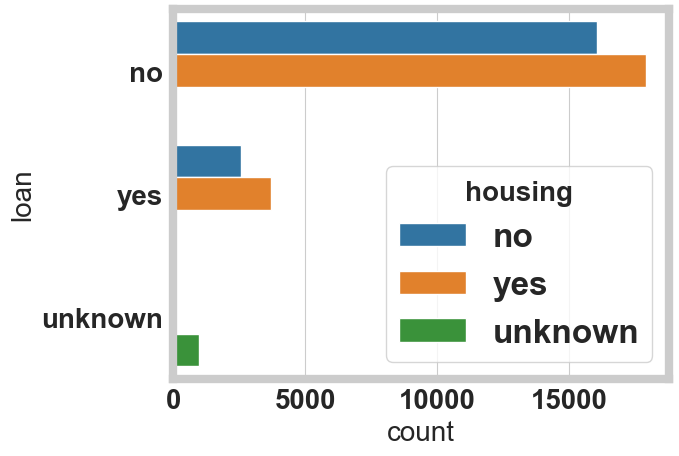

In [310]:
sns.countplot(raw_df, y = 'loan', hue = 'housing')

In [311]:
def plot_counts_and_normalized_counts(data: pd.DataFrame, column: str, target:str = 'Subscription' , 
    figsize: tuple = (16, 8), show_counts_table: bool = True) -> None:
    """
    Plots counts and normalized counts of a specified column with a hue.

    Parameters:
    - data (pd.DataFrame): The DataFrame containing the data.
    - column (str): The categorical column to plot counts and normalized counts for.
    - target (str): The categorical target column.
    - figsize (tuple): The size of the figure (default is (16, 8)).

    Returns:
    - None: Displays the plot with counts and normalized counts.
    """
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = figsize, sharey = True)

    # Group by the specified column and hue, and count occurrences
    counts = data.groupby([column, target]).size().sort_values(ascending = False).reset_index(name ='target_counts')

    # Calculate the total counts for each hue category
    total_counts = data.groupby(column).size().sort_values(ascending = False).reset_index(name = 'total_category_counts')

    # Merge the total counts with the counts
    counts = counts.merge(total_counts, on = column)

    if show_counts_table:
        print(counts)

    # Calculate the normalized counts
    counts['normalized_counts'] = counts['target_counts'] * 100.0/ counts['total_category_counts']

    # Plot using sns.barplot()
    sns.barplot(data=counts, y = column, x = 'target_counts', hue = target, ax = ax1)
    sns.barplot(data=counts, y=column, x = 'normalized_counts', hue = target, legend = False, ax = ax2)

    # Adjust layout and labels
    plt.tight_layout()
    ax1.set_ylabel(None)
    ax2.set_ylabel(None)

    # Hide all spines for both subplots
    for ax in [ax1, ax2]:
        for spine in ax.spines.values():
            spine.set_visible(False)

    # Set title and labels
    ax1.set_xlabel("Category Counts", fontdict={'weight': 'bold'})
    ax2.set_xlabel("Category Subscription Percentage", fontdict={'weight': 'bold'})
    plt.suptitle(f"Counts and Percentage of Subscription for each Category in {column.capitalize()}")
    plt.subplots_adjust(top = 0.92)

    # Add legend to ax1
    ax1.legend(labelcolor='linecolor', title = target , loc = 'lower right')

    plt.show()


In [312]:
def plot_numeric_distribution(data: pd.DataFrame, column: str, target:str = 'Subscription', 
    multiple:str = 'stack', kde: bool = True, figsize: tuple = (16, 8)) -> None:
    """
    Plots histogram and normalized histogram of a specified column with a hue.

    Parameters:
    - data (pd.DataFrame): The DataFrame containing the data.
    - column (str): The numerical column to histogram and normalized histogram for.
    - target (str): The categorical target column which is used as hue.
    - multiple (str): Specifies how multiple histograms are arranged (default 'stack').Other
    options are 'dodge', 'layer' and 'fill'.
    - kde (bool): Whether to plot kde on top of histogram (default True).
    - figsize (tuple): The size of the figure (default is (16, 8)).

    Returns:
    - None: Displays the plot with hostogram and normalized histogram for numeric column.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 8), sharey = True)


    sns.histplot(data = data, y = column, hue = target, kde = kde, legend = False,
                alpha=0.6, multiple = multiple, ax = ax1)

    # Normalize histogram independently for each type of Subscription
    sns.histplot(data = data, y = column, hue = target, kde = kde, alpha=0.6,
                multiple=multiple, stat='percent', common_norm=False, ax=ax2)

    plt.tight_layout()

    # Hide all spines for both subplots
    for ax in [ax1, ax2]:
        for spine in ax.spines.values():
            spine.set_visible(False)

   # Set title and labels
    ax1.set_ylabel(column.capitalize(), fontdict={'weight': 'bold'})
    ax1.set_xlabel("Subscription Counts", fontdict={'weight': 'bold'})
    ax2.set_xlabel("Subscription Percentage", fontdict={'weight': 'bold'})
   

    plt.suptitle(f"Distribution of Counts and Percentage of Normalized Subscription for {column.capitalize()}")
    plt.subplots_adjust(top = 0.92)
    plt.show()

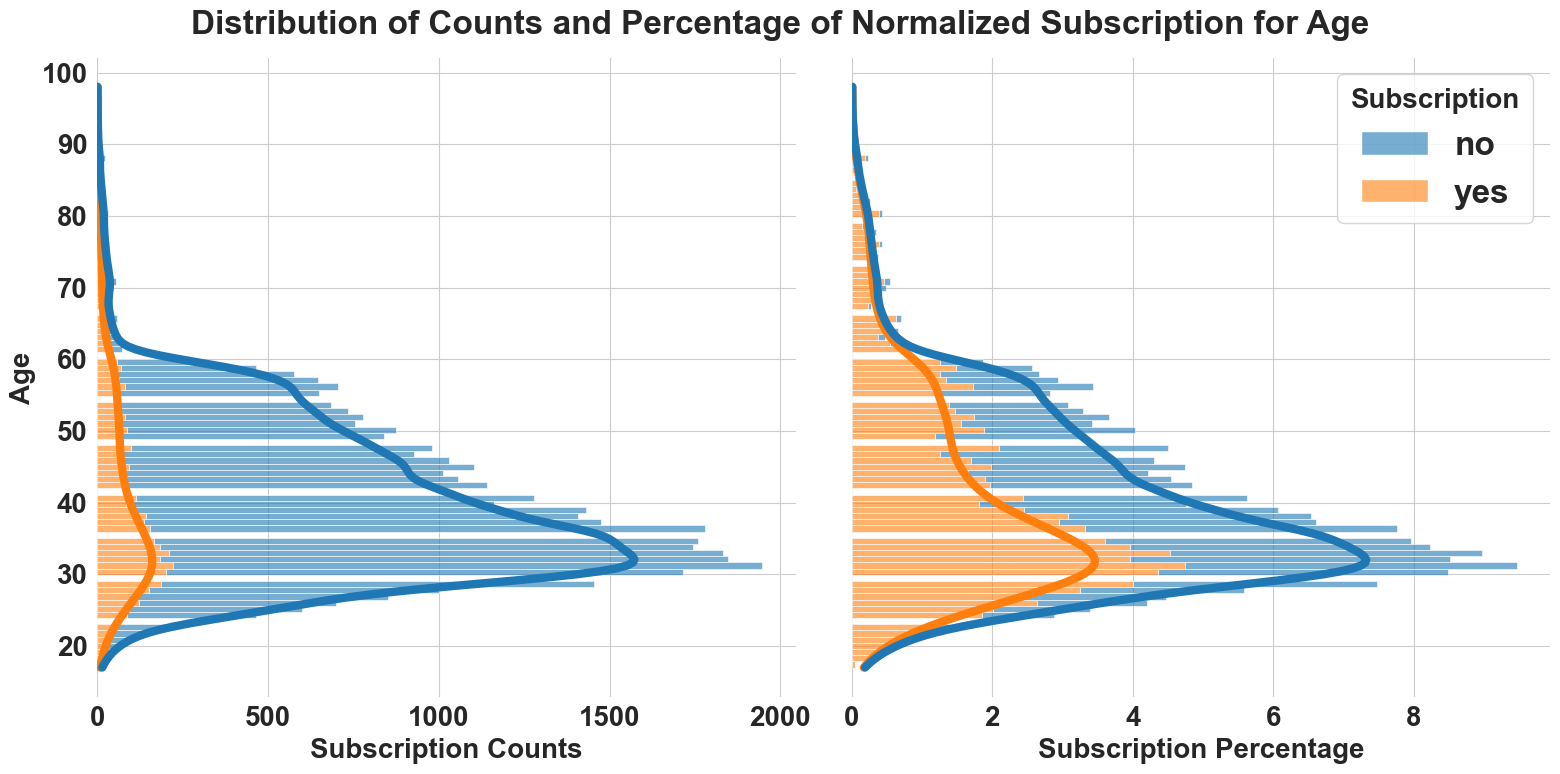

In [313]:
plot_numeric_distribution(raw_df, column = 'age')

              job Subscription  target_counts  total_category_counts
0          admin.           no           9070                  10422
1     blue-collar           no           8616                   9254
2      technician           no           6013                   6743
3        services           no           3646                   3969
4      management           no           2596                   2924
5          admin.          yes           1352                  10422
6    entrepreneur           no           1332                   1456
7         retired           no           1286                   1720
8   self-employed           no           1272                   1421
9       housemaid           no            954                   1060
10     unemployed           no            870                   1014
11     technician          yes            730                   6743
12    blue-collar          yes            638                   9254
13        student           no    

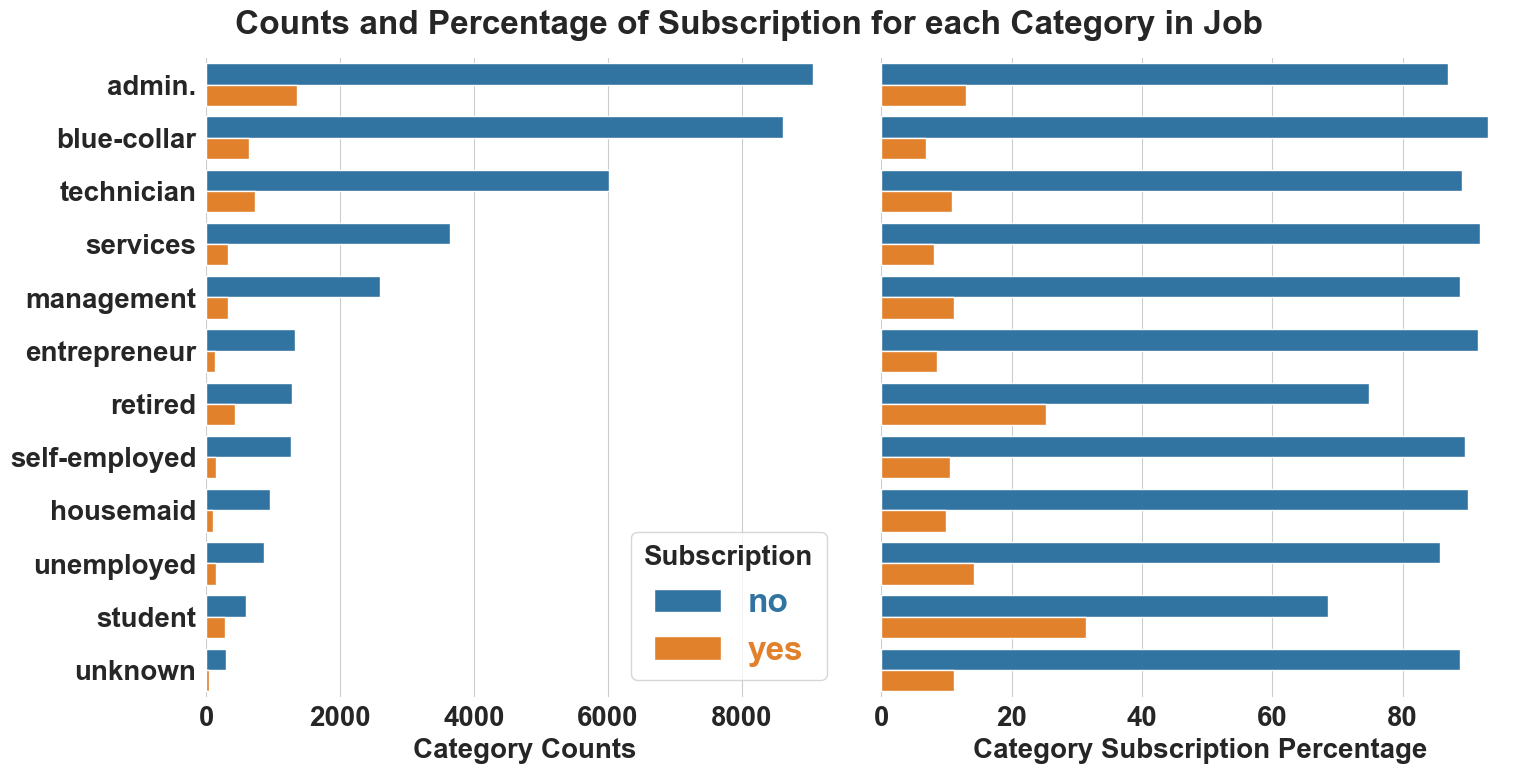

In [314]:
plot_counts_and_normalized_counts(raw_df, column = 'job')

    marital Subscription  target_counts  total_category_counts
0   married           no          22396                  24928
1    single           no           9948                  11568
2  divorced           no           4136                   4612
3   married          yes           2532                  24928
4    single          yes           1620                  11568
5  divorced          yes            476                   4612
6   unknown           no             68                     80
7   unknown          yes             12                     80


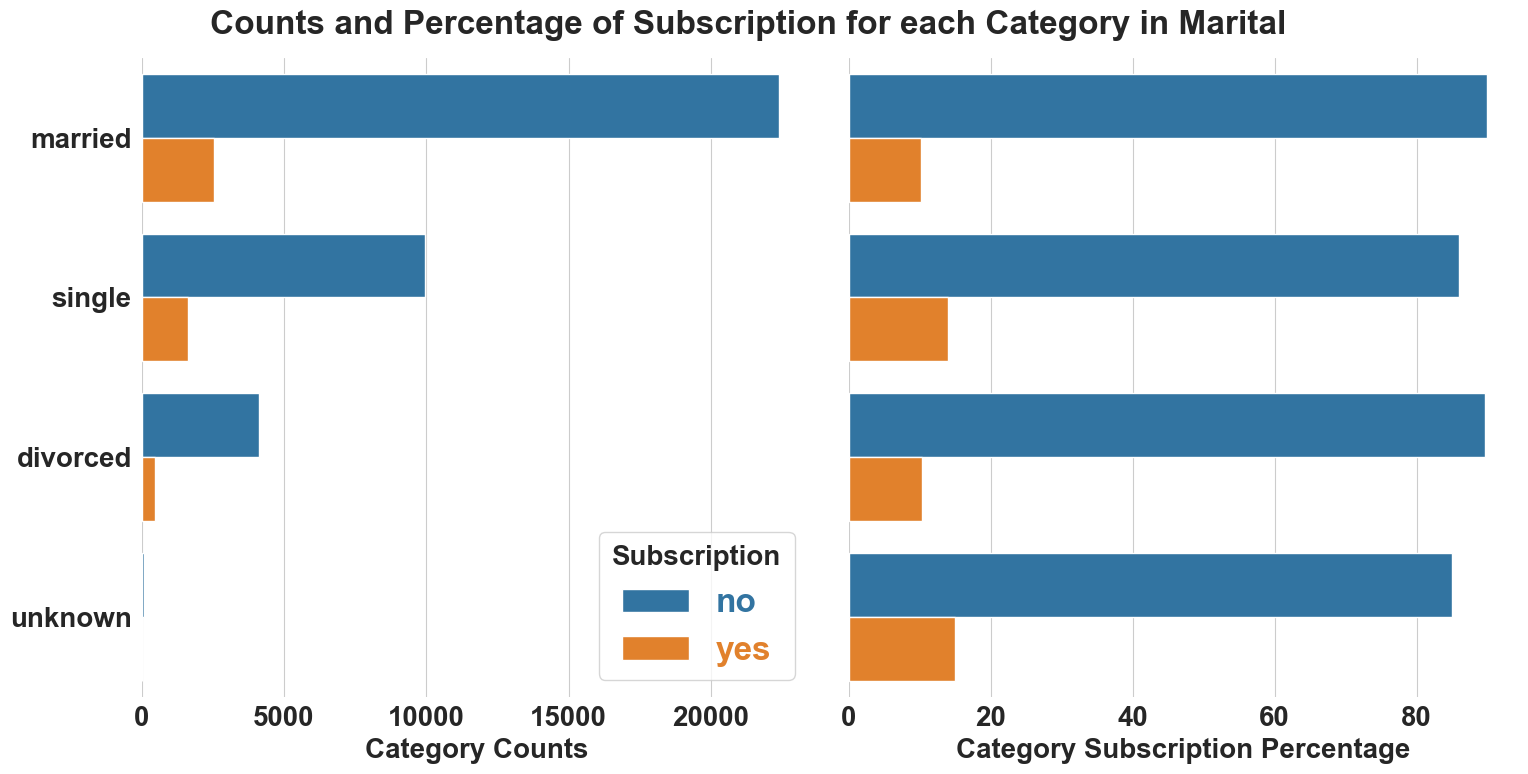

In [315]:
plot_counts_and_normalized_counts(raw_df, column = 'marital')

              education Subscription  target_counts  total_category_counts
0     university.degree           no          10498                  12168
1           high.school           no           8484                   9515
2              basic.9y           no           5572                   6045
3   professional.course           no           4648                   5243
4              basic.4y           no           3748                   4176
5              basic.6y           no           2104                   2292
6     university.degree          yes           1670                  12168
7               unknown           no           1480                   1731
8           high.school          yes           1031                   9515
9   professional.course          yes            595                   5243
10             basic.9y          yes            473                   6045
11             basic.4y          yes            428                   4176
12              unknown  

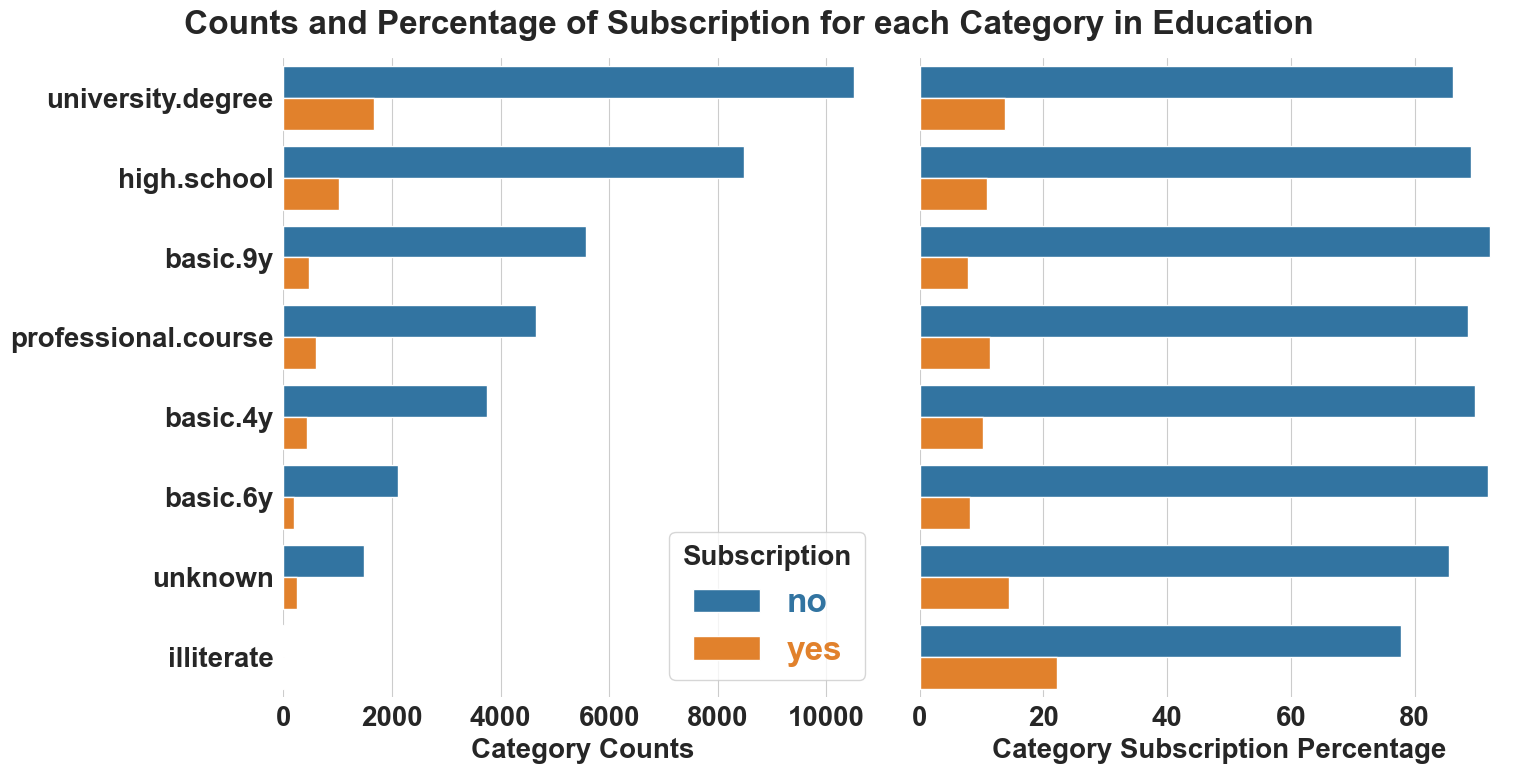

In [316]:
plot_counts_and_normalized_counts(raw_df, column = 'education')

#### Behaviroal Segmentation

These features describe how the customer behaves in terms of financial behavior, response to campaigns, and interaction with financial products.

- **Default** (`default`): Indicates financial reliability and risk behavior.
- **Housing** (`housing`): Whether the customer has a mortgage can indicate long-term financial commitments.
- **Loan** (`loan`): Presence of a personal loan suggests borrowing behavior.
- **Poutcome** (`poutcome`): Outcome of the previous marketing campaign; indicates the customer’s past engagement and response.
- **Campaign** (`campaign`): Shows engagement with marketing efforts, indicating responsiveness.
- **Pdays** (`pdays`): Days since the last contact—could indicate recency of interaction.
- **Previous** (`previous`): Number of previous contacts, showing historical interaction with the customer.

duration -> when do customers are likely to interact more? (month, day of week etc)


default     no  unknown  yes
housing                     
no       14614     4006    2
unknown    763      227    0
yes      17211     4364    1


<Axes: xlabel='count', ylabel='housing'>

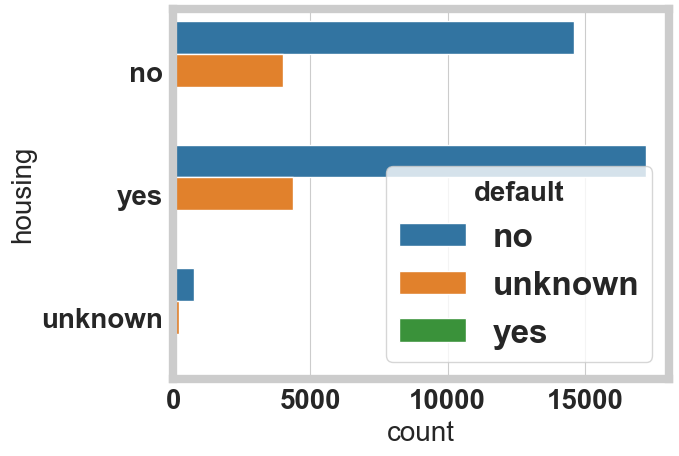

In [317]:
print(pd.crosstab(raw_df['housing'], raw_df['default']))
sns.countplot(raw_df, y = 'housing', hue = 'default')

   default Subscription  target_counts  total_category_counts
0       no           no          28391                  32588
1  unknown           no           8154                   8597
2       no          yes           4197                  32588
3  unknown          yes            443                   8597
4      yes           no              3                      3


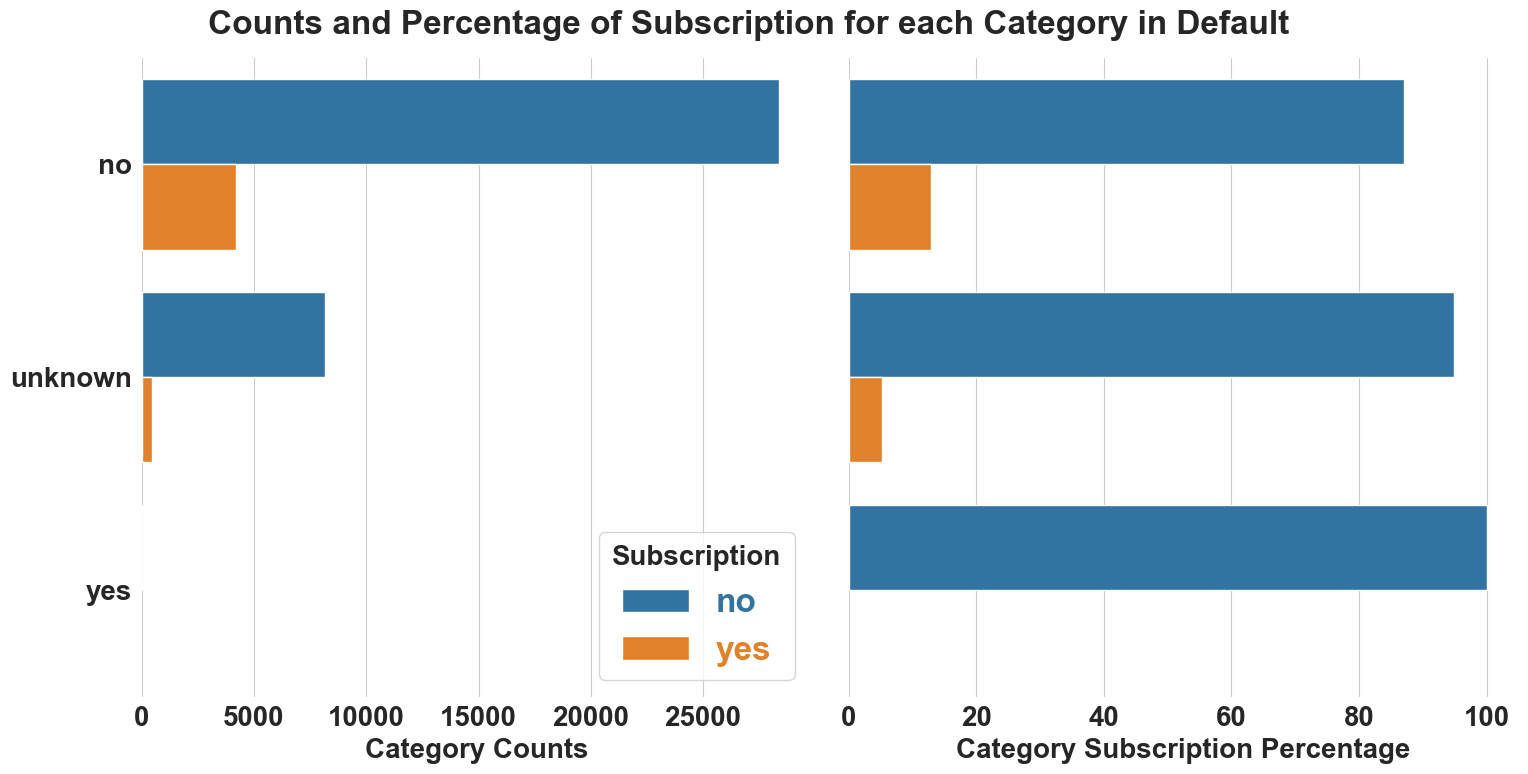

In [318]:
plot_counts_and_normalized_counts(data = raw_df, column = 'default')

   housing Subscription  target_counts  total_category_counts
0      yes           no          19069                  21576
1       no           no          16596                  18622
2      yes          yes           2507                  21576
3       no          yes           2026                  18622
4  unknown           no            883                    990
5  unknown          yes            107                    990


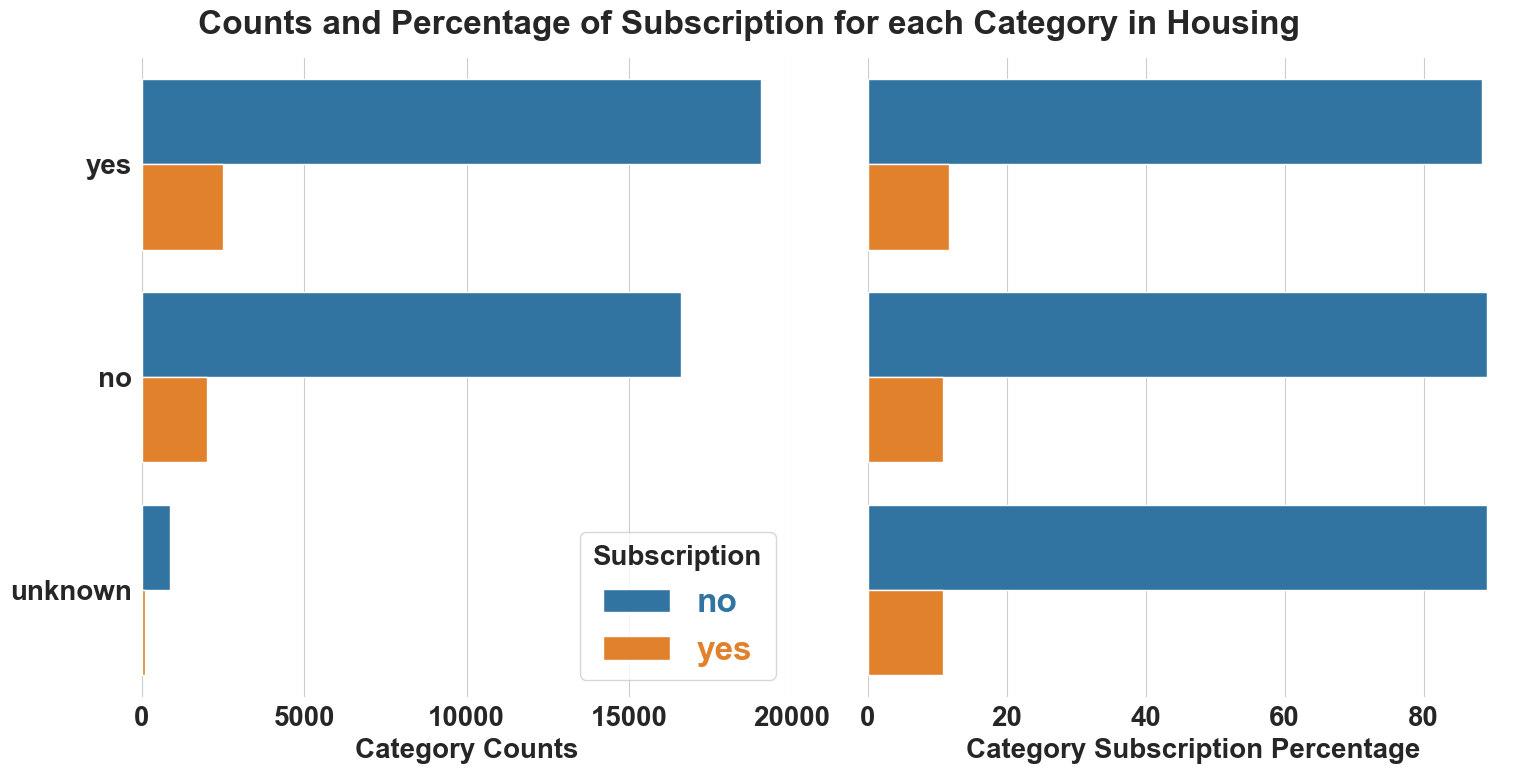

In [319]:
plot_counts_and_normalized_counts(data = raw_df, column = 'housing')

      loan Subscription  target_counts  total_category_counts
0       no           no          30100                  33950
1      yes           no           5565                   6248
2       no          yes           3850                  33950
3  unknown           no            883                    990
4      yes          yes            683                   6248
5  unknown          yes            107                    990


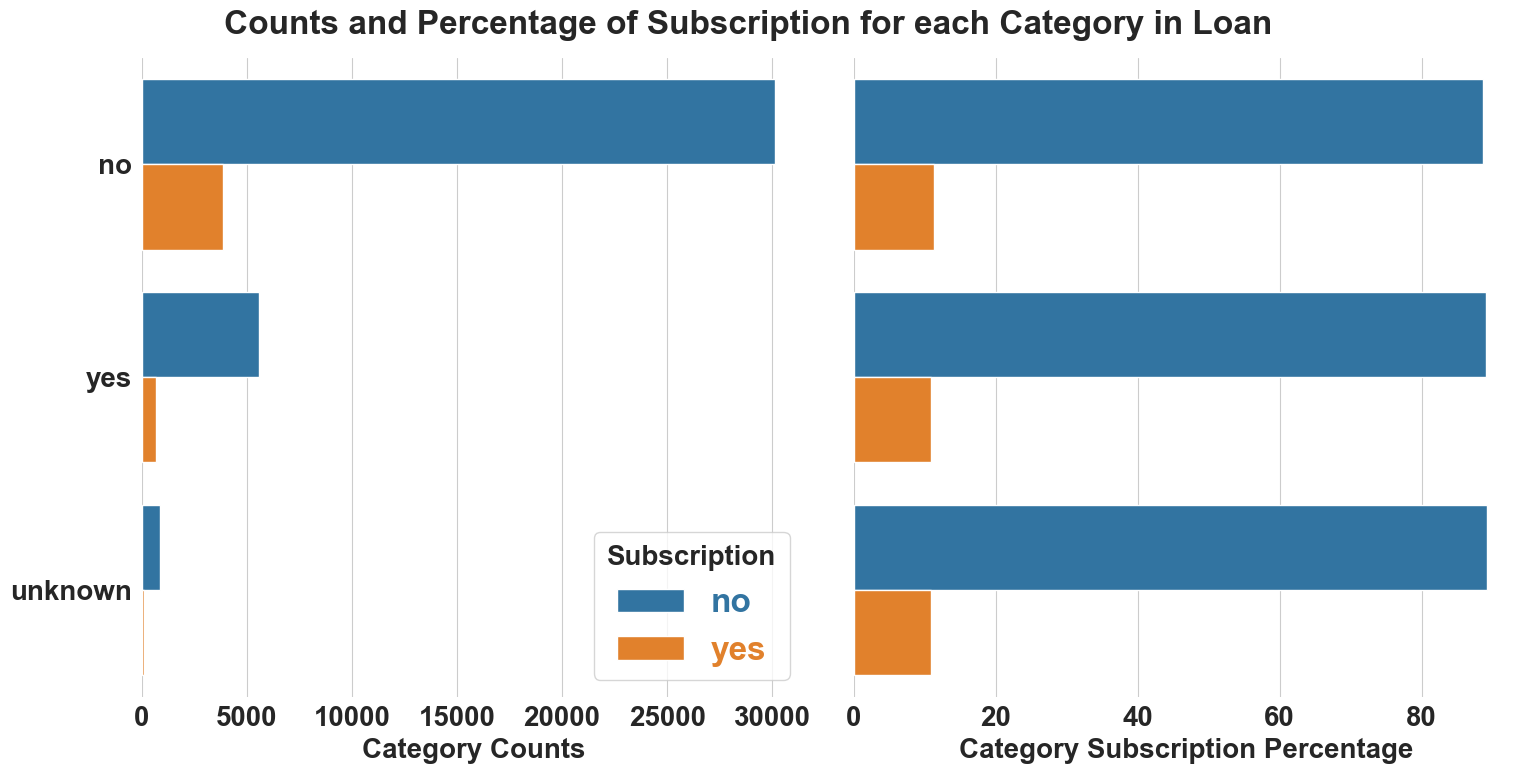

In [320]:
plot_counts_and_normalized_counts(data = raw_df, column = 'loan')

      poutcome Subscription  target_counts  total_category_counts
0  nonexistent           no          32422                  35563
1      failure           no           3647                   4252
2  nonexistent          yes           3141                  35563
3      success          yes            894                   1373
4      failure          yes            605                   4252
5      success           no            479                   1373


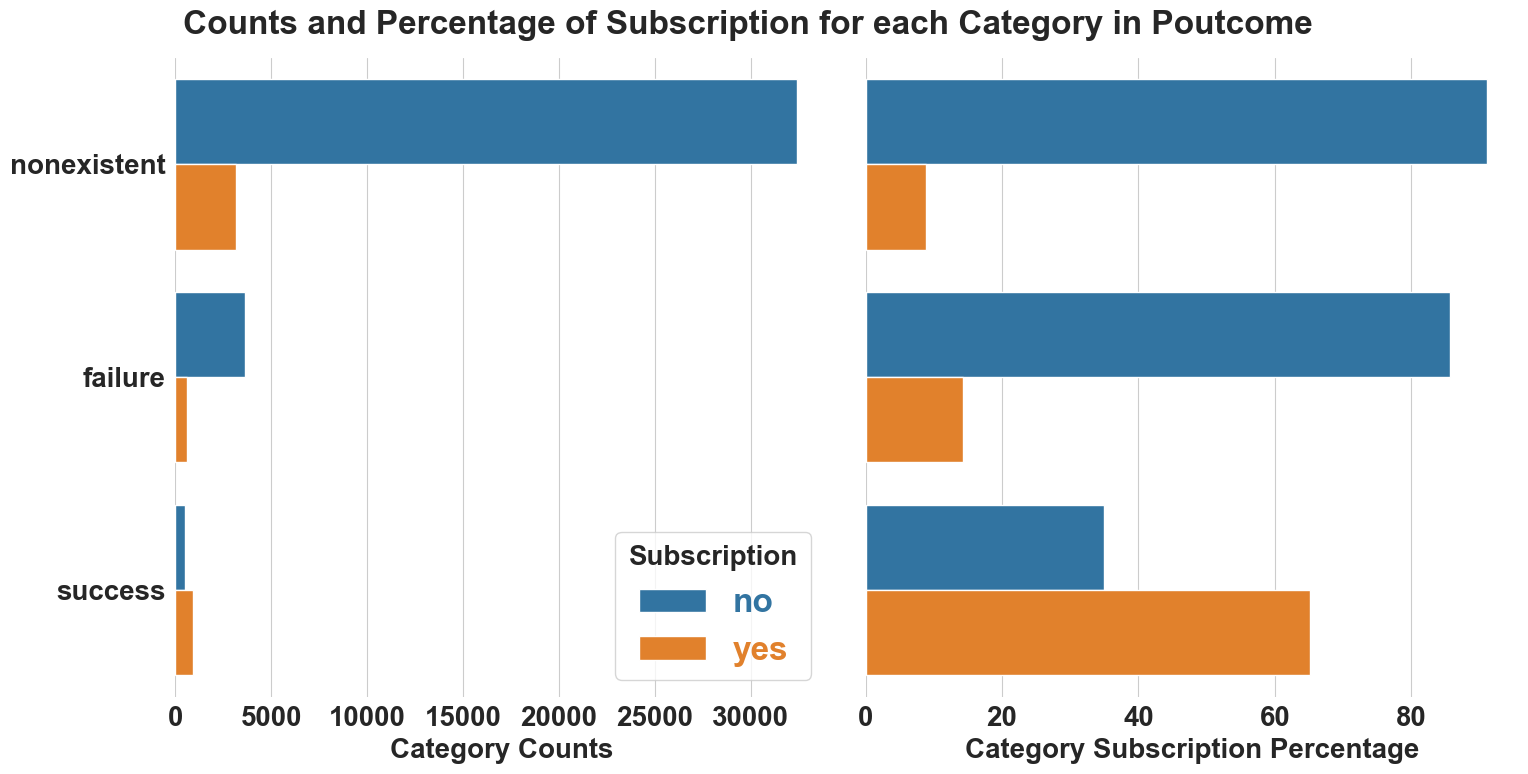

In [321]:
plot_counts_and_normalized_counts(data = raw_df, column = 'poutcome')

Subscription     no   yes  percentage_yes
campaign                                 
1             15342  2300       13.037071
2              9359  1211       11.456954
3              4767   574       10.747051
4              2402   249        9.392682
5              1479   120        7.504690
6               904    75        7.660878
7               591    38        6.041335
8               383    17        4.250000
9               266    17        6.007067
10              213    12        5.333333
11              165    12        6.779661
12              122     3        2.400000
13               88     4        4.347826
14               68     1        1.449275
15               49     2        3.921569
16               51     0        0.000000
17               54     4        6.896552
18               33     0        0.000000
19               26     0        0.000000
20               30     0        0.000000
21               24     0        0.000000
22               17     0        0

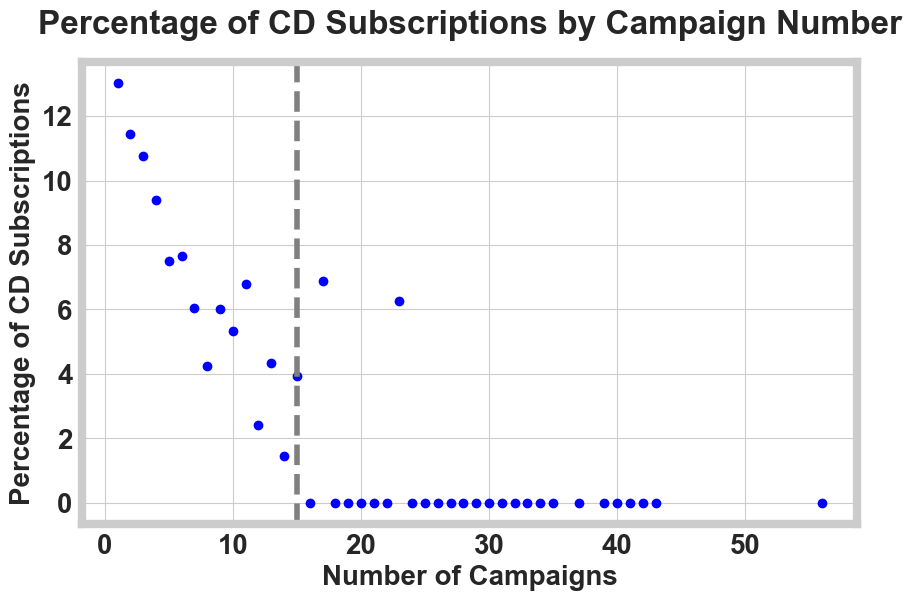

In [379]:
# since the campaign counts for larger than 10 campaign attempts are small
# lets see how the percentage of subscription success changes with campaign attempts

# Calculate the percentage of 'yes' subscriptions for each campaign number
campaign_counts = raw_df.groupby(['campaign', 'Subscription']).size().unstack(fill_value=0)
campaign_counts['percentage_yes'] = campaign_counts['yes'] / (campaign_counts['yes'] + campaign_counts['no']) * 100
print(campaign_counts)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(campaign_counts.index, campaign_counts['percentage_yes'], color='blue')
plt.axvline(15, linestyle = '--', color = 'gray', linewidth = 4.0)
plt.xlabel('Number of Campaigns', fontdict = {'weight': 'bold'})
plt.ylabel("Percentage of CD Subscriptions", fontdict = {'weight': 'bold'})
plt.title("Percentage of CD Subscriptions by Campaign Number", fontdict = {'weight': 'bold'})
plt.show()


## Binary Classification Model Selection

### Handling Outliers

In [323]:
# Lets create a copy of raw_df
df = raw_df.copy(deep = True)

# Since duration = 0 does not have predictive power, lets drop them
df = df.query("duration > 0").reset_index(drop = True)
print(df.shape)

(41184, 21)


In [324]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41184.000000,41184.000000,41184.000000,41184.000000,41184.000000,41184.00000,41184.000000,41184.000000,41184.000000,41184.000000
mean,40.023529,258.310096,2.567381,962.471907,0.172980,0.08192,93.575686,-40.502508,3.621337,5167.037145
std,10.421044,259.279344,2.769895,186.919638,0.494922,1.57096,0.578849,4.628128,1.734438,72.252762
min,17.000000,1.000000,1.000000,0.000000,0.000000,-3.40000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.80000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.10000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.40000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.40000,94.767000,-26.900000,5.045000,5228.100000


In [325]:
def inspect_numerical_outliers(df):
    numeric_cols = df.select_dtypes(include = 'number').columns
    for col in numeric_cols:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
        sns.boxplot(data=df, x=col, ax=ax1)
        sns.histplot(data=df, x=col, ax=ax2)
        plt.tight_layout()
        plt.show()

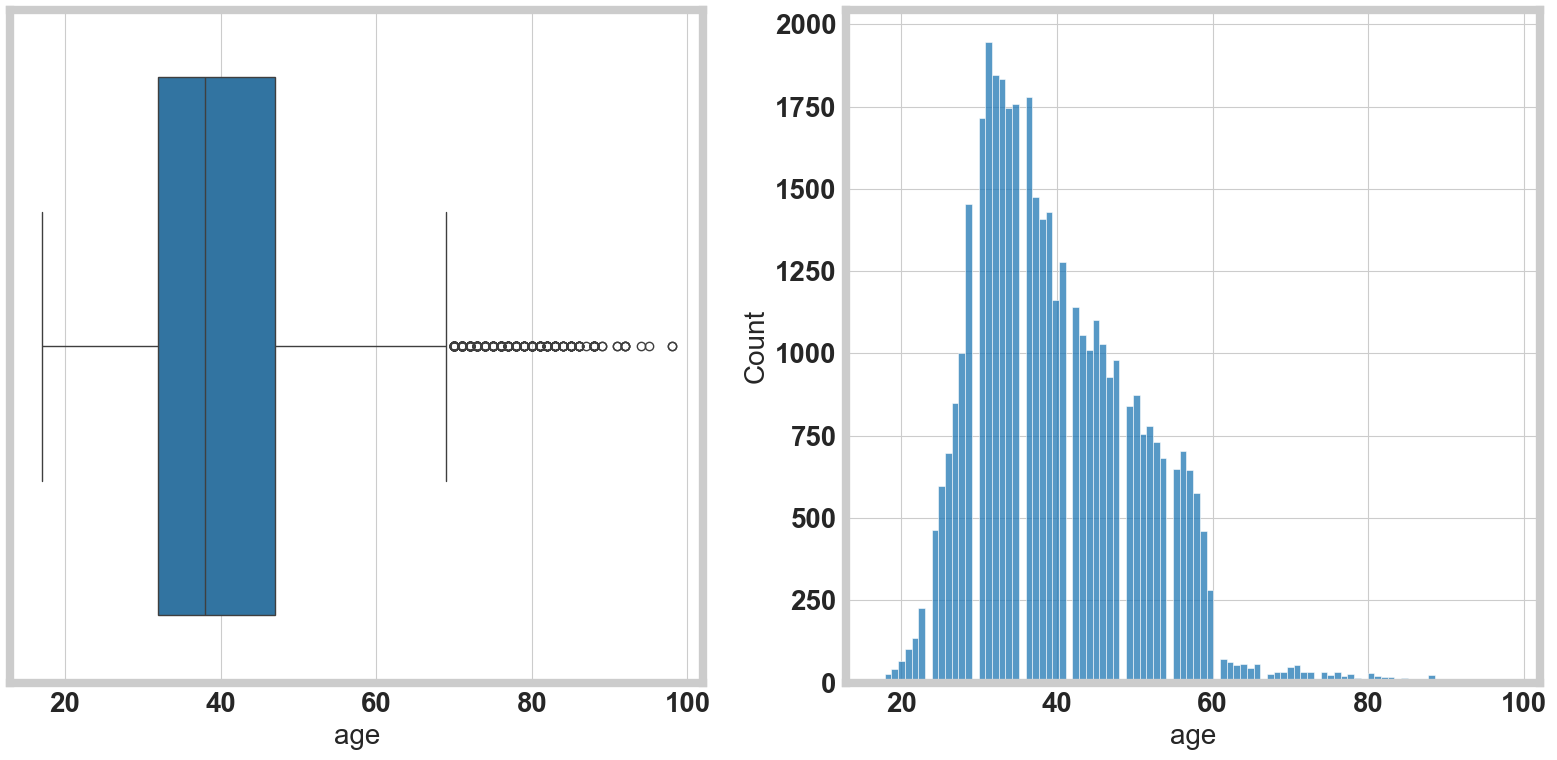

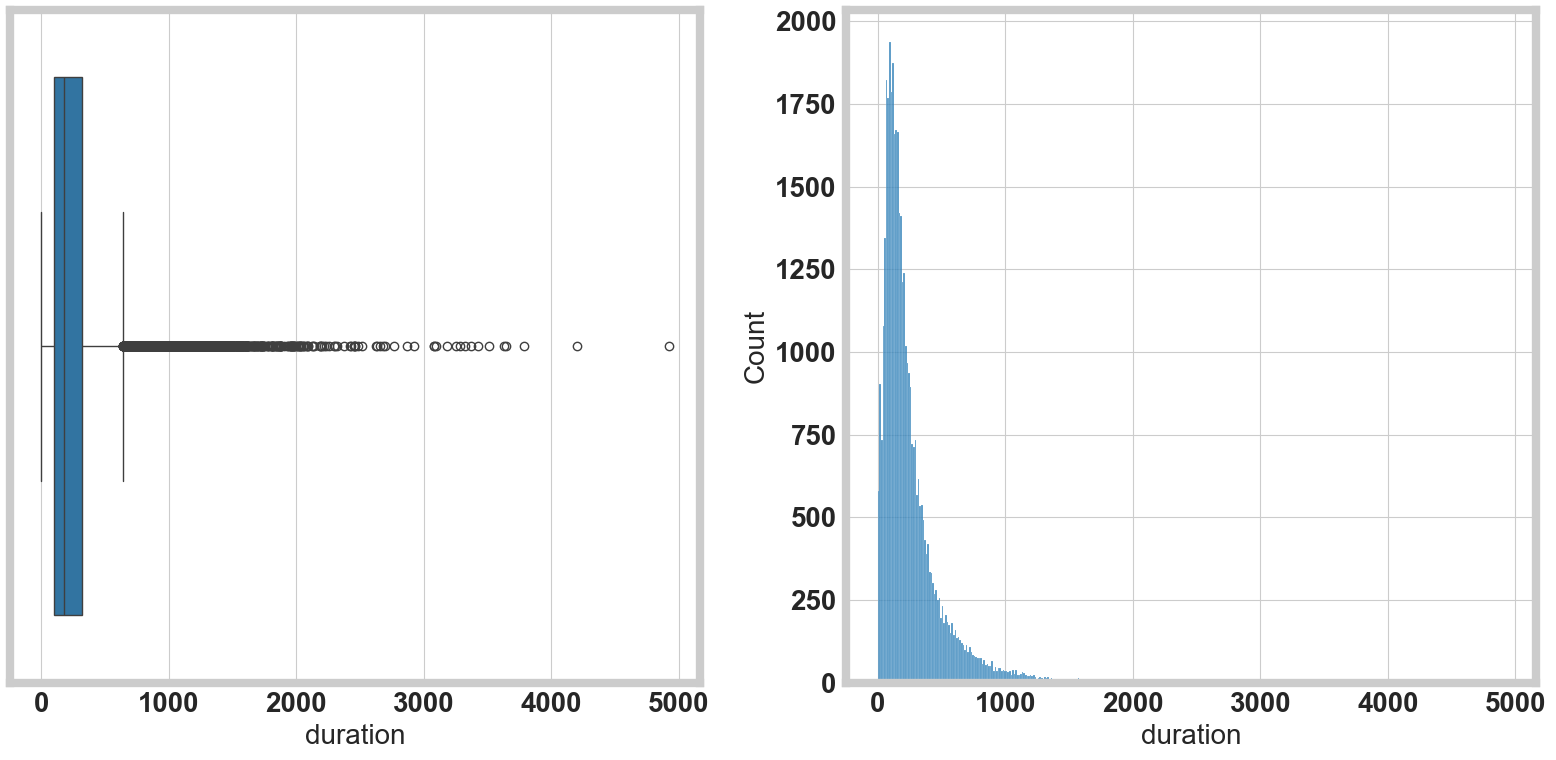

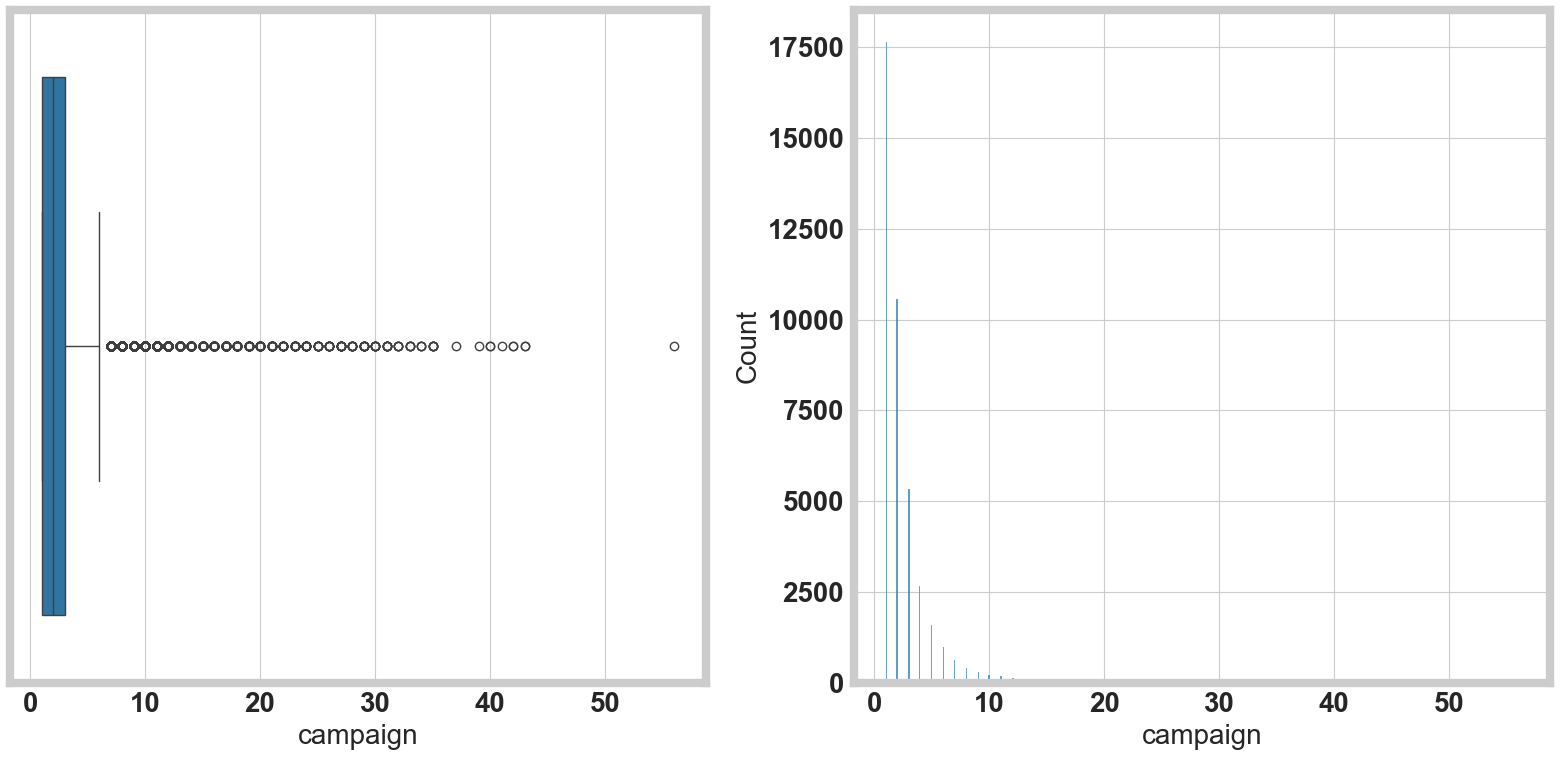

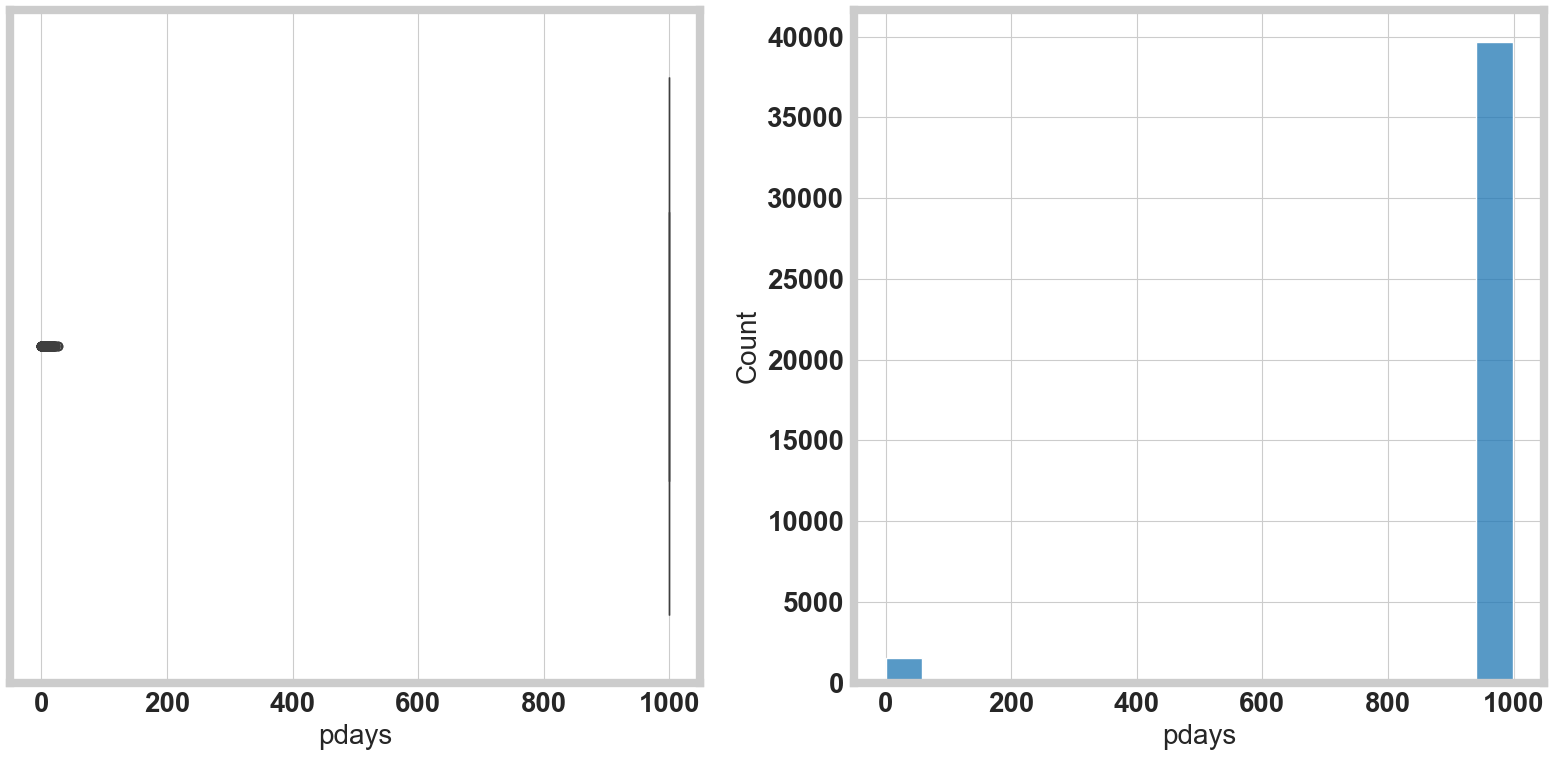

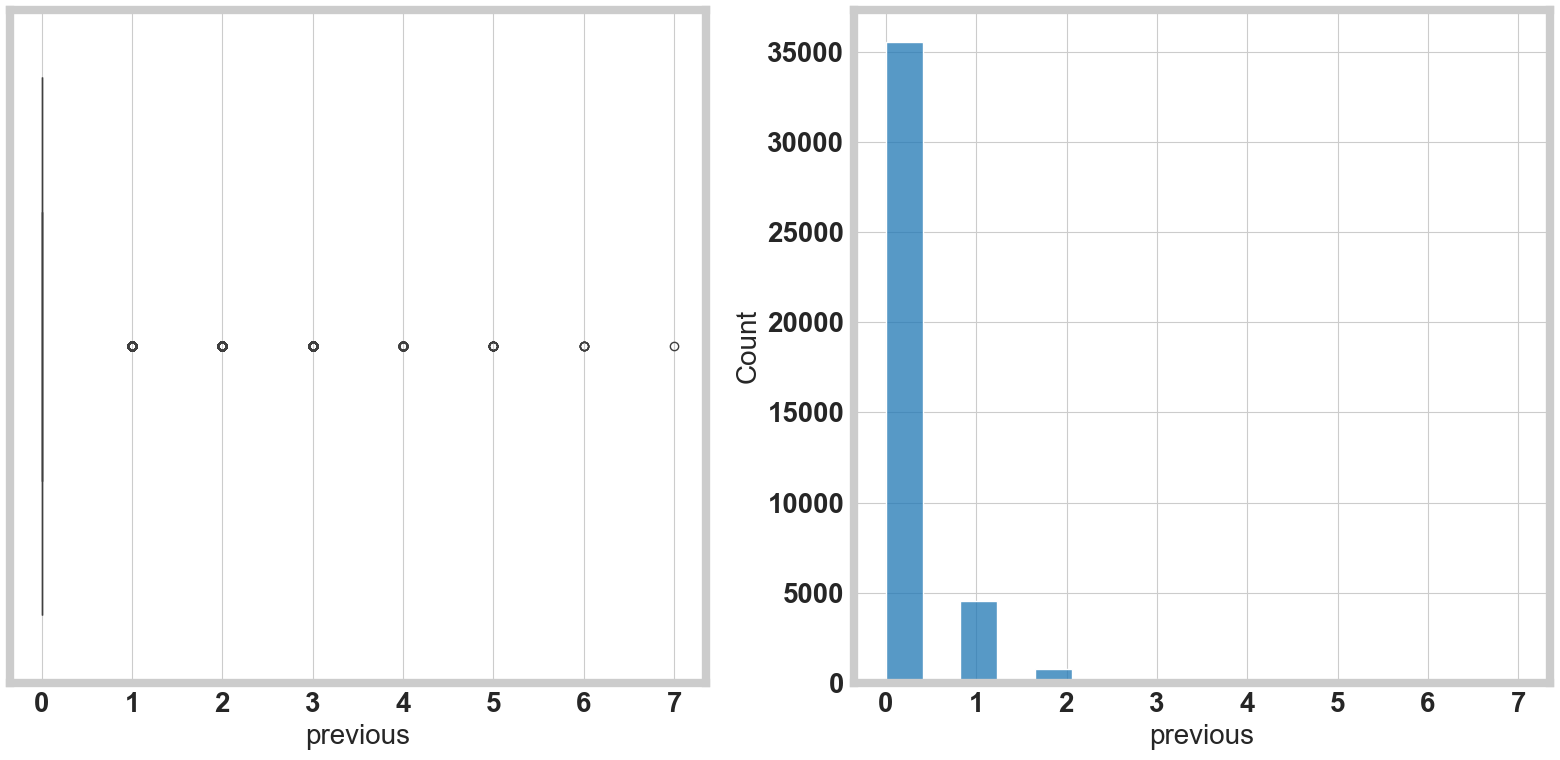

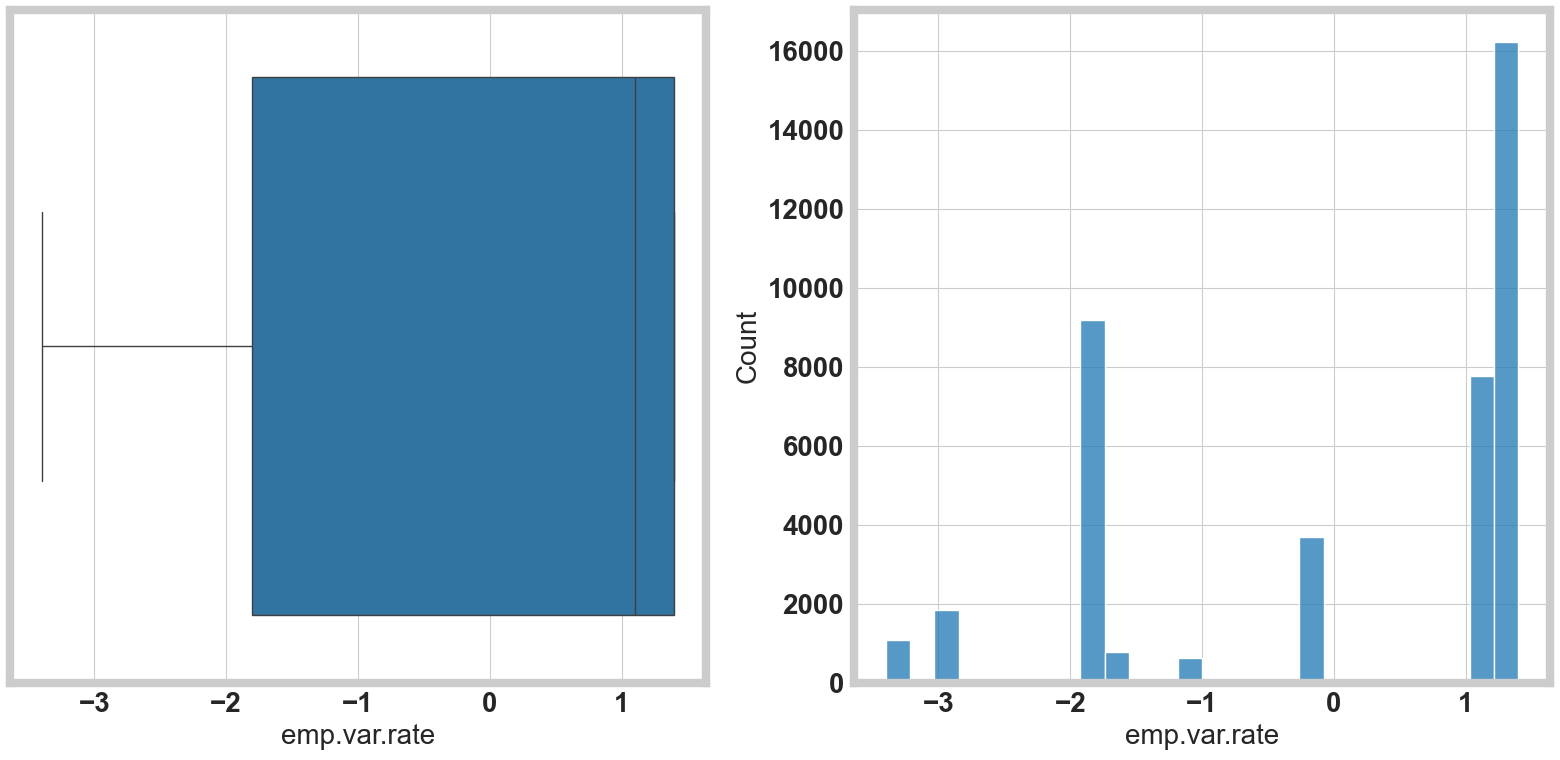

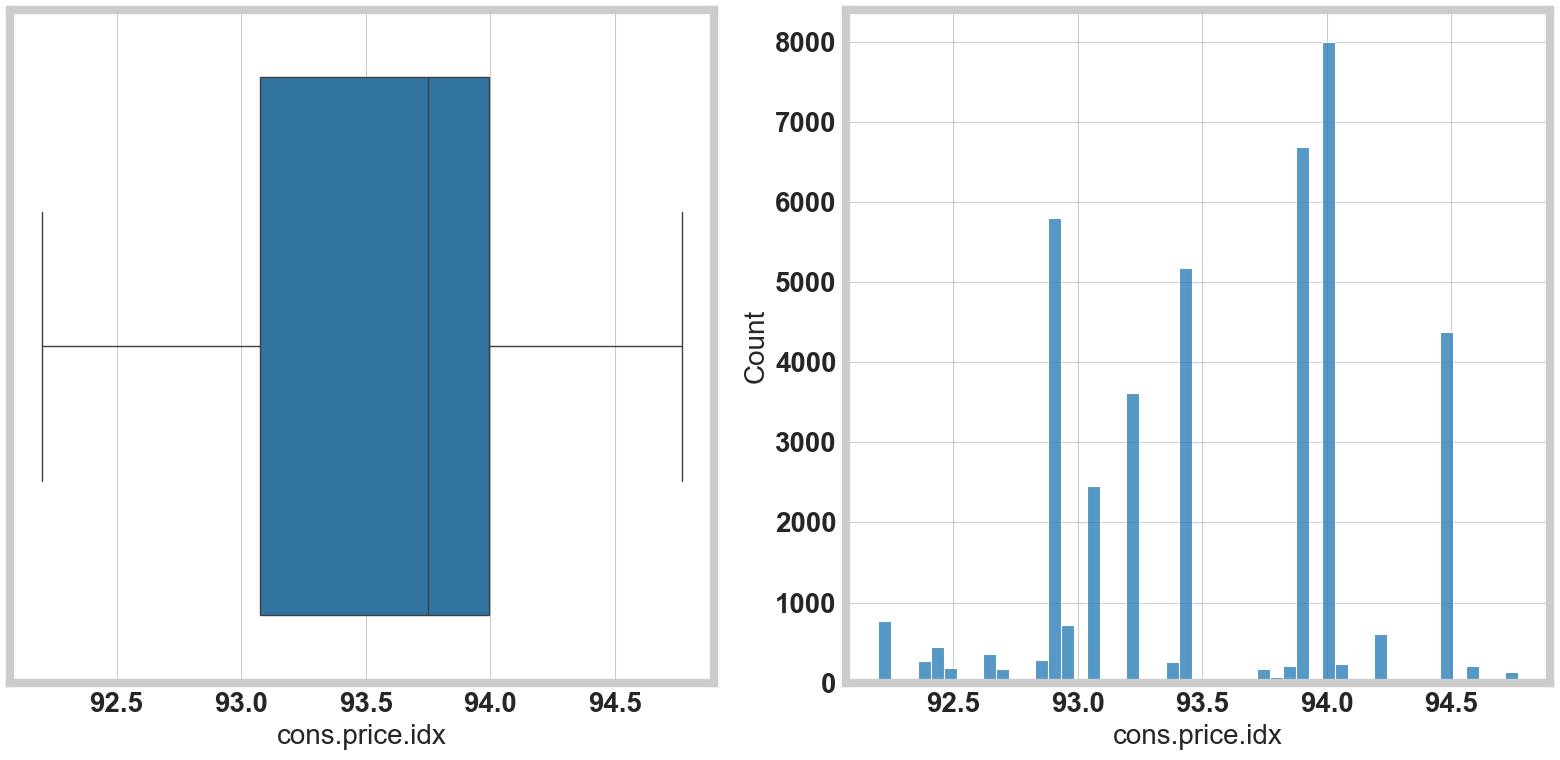

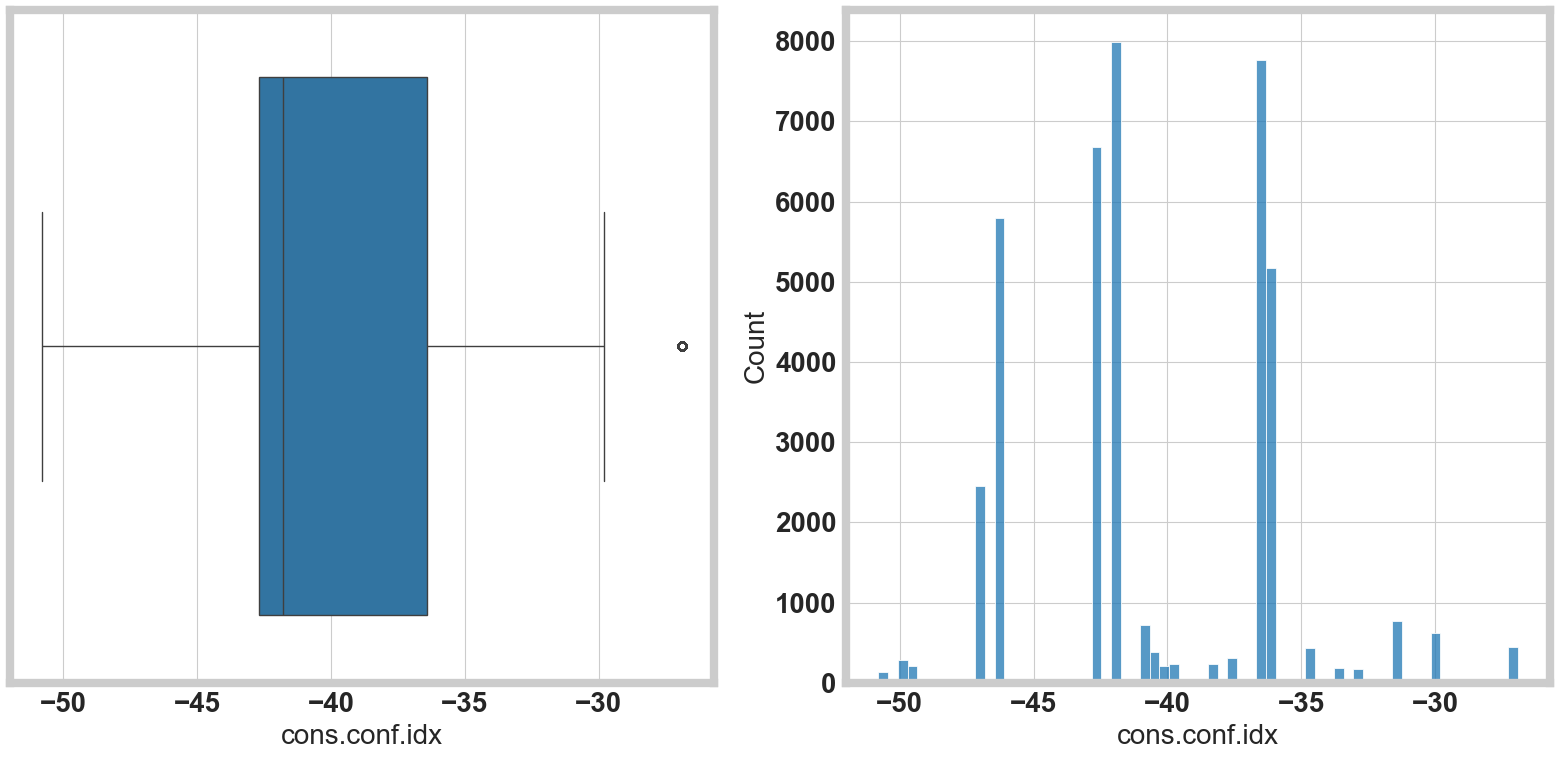

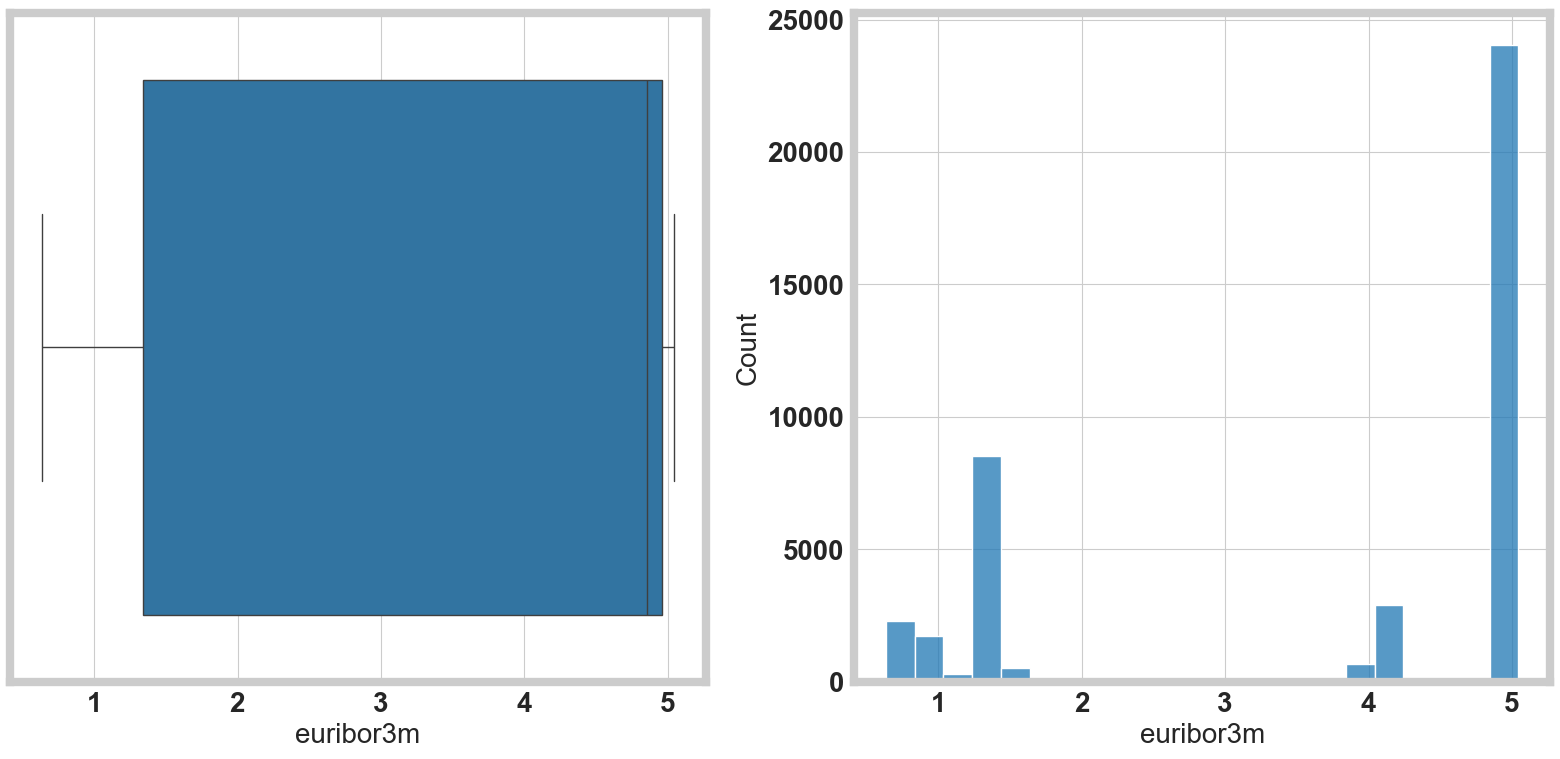

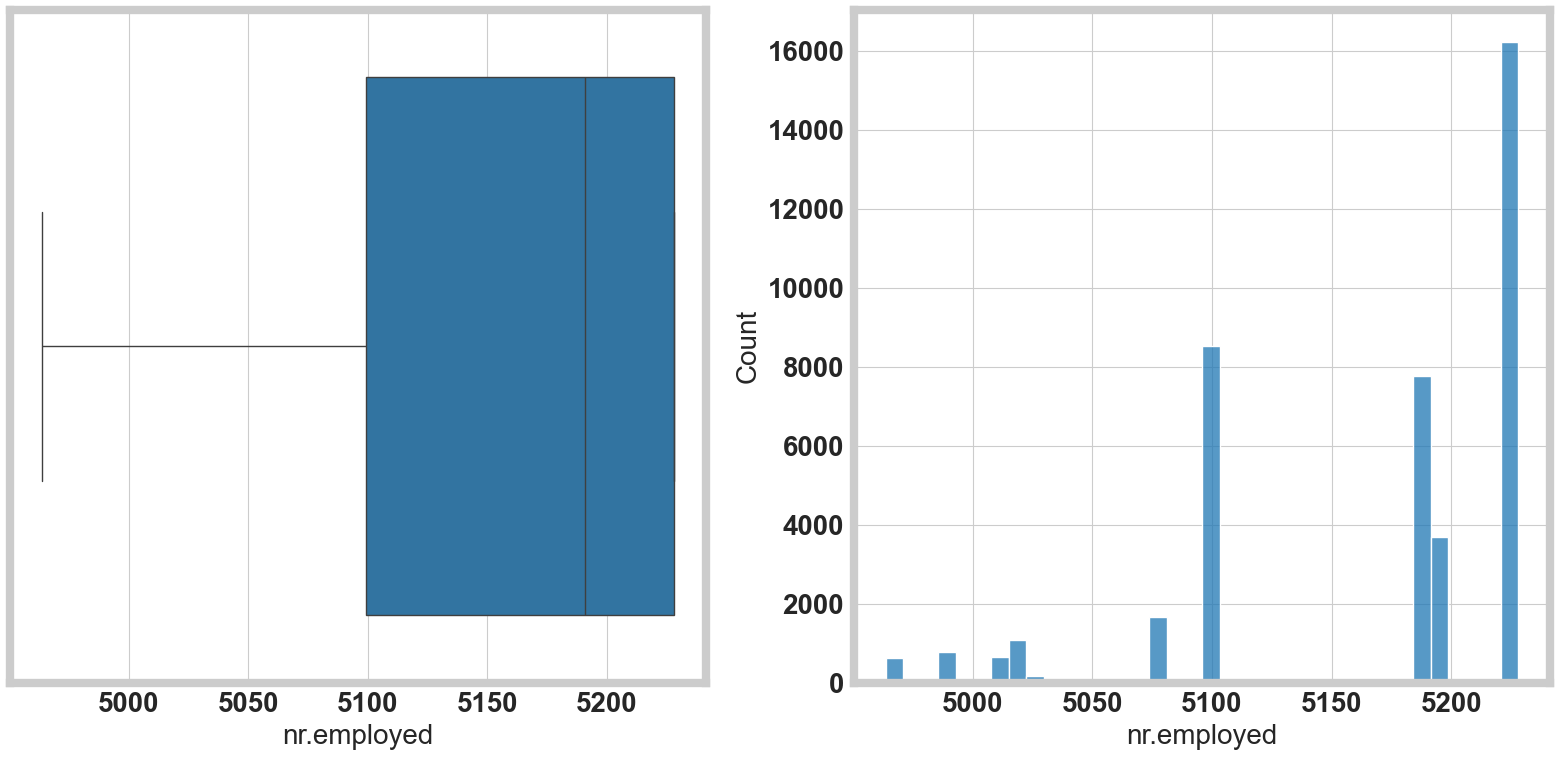

In [326]:
inspect_numerical_outliers(df)

In [327]:
def winsorize(df:pd.DataFrame, lower_percentile: float = 0.05, upper_percentile:float = 0.95,
 exclude_columns: List = None) -> pd.DataFrame:
    """
    Apply winsorization to numeric columns in a DataFrame.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    lower_percentile (float): The lower percentile for capping.
    upper_percentile (float): The upper percentile for capping.
    exclude_columns (list): List of columns to exclude from winsorization.
    
    Returns:
    pd.DataFrame: The DataFrame with winsorized numeric columns.
    """
    df_winsorized = df.copy()
    numeric_columns = df_winsorized.select_dtypes(include='number').columns
    winsorize_columns = set(numeric_columns) - set(exclude_columns) if exclude_columns else numeric_columns
    
    for col in winsorize_columns:
        lower_value = df_winsorized[col].quantile(lower_percentile)
        upper_value = df_winsorized[col].quantile(upper_percentile)
        df_winsorized[col] = np.where(df_winsorized[col] < lower_value, lower_value, df_winsorized[col])
        df_winsorized[col] = np.where(df_winsorized[col] > upper_value, upper_value, df_winsorized[col])
    
    return df_winsorized


In [328]:
winsorized_df = winsorize(df, exclude_columns = ['pdays'])

In [331]:
from scipy.stats import mannwhitneyu

def plot_kde_before_after(df, winsorized_df, exclude_columns=None):
    """
    Plot KDE for all numeric columns before and after winsorization and print Wilcoxon rank-sum test results.
    
    Parameters:
    df (pd.DataFrame): The original DataFrame.
    winsorized_df (pd.DataFrame): The winsorized DataFrame.
    exclude_columns (list): List of columns to exclude from plotting.
    """
    numeric_columns = df.select_dtypes(include='number').columns
    plot_columns = set(numeric_columns) - set(exclude_columns) if exclude_columns else numeric_columns
    
    for column in plot_columns:
        fig, ax = plt.subplots(1, 1, figsize=(10, 6))

        # Stacked KDE plots
        sns.kdeplot(df[column], ax=ax, label='Original', fill=True, alpha=0.5)
        sns.kdeplot(winsorized_df[column], ax=ax, label='Winsorized', fill=True, alpha=0.5)
        ax.set_title(f'Stacked KDE Plot for {column}', fontweight = 'bold')
        ax.set_xlabel(f"{column.capitalize()}", fontweight = 'bold')
        ax.set_ylabel(f"Density", fontweight = 'bold')
        ax.legend(labelcolor = 'linecolor')

        plt.tight_layout()
        plt.show()

        # Wilcoxon rank-sum test
        u_stat, p_value = mannwhitneyu(df[column], winsorized_df[column])
        print(f"Wilcoxon rank-sum test for '{column}': U Statistic: {u_stat:.4f}, P-value: {p_value:.4f}")
        if p_value < 0.05:
            print(f"The distributions of '{column}' are significantly different (p < 0.05).")
        else:
            print(f"The distributions of '{column}' are not significantly different (p >= 0.05).")


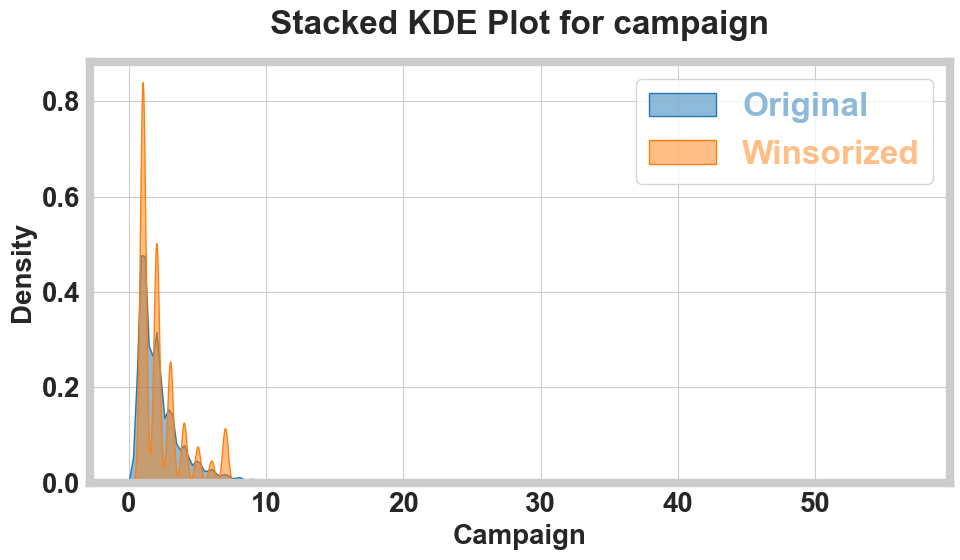

Wilcoxon rank-sum test for 'campaign': U Statistic: 850196568.0000, P-value: 0.5099
The distributions of 'campaign' are not significantly different (p >= 0.05).


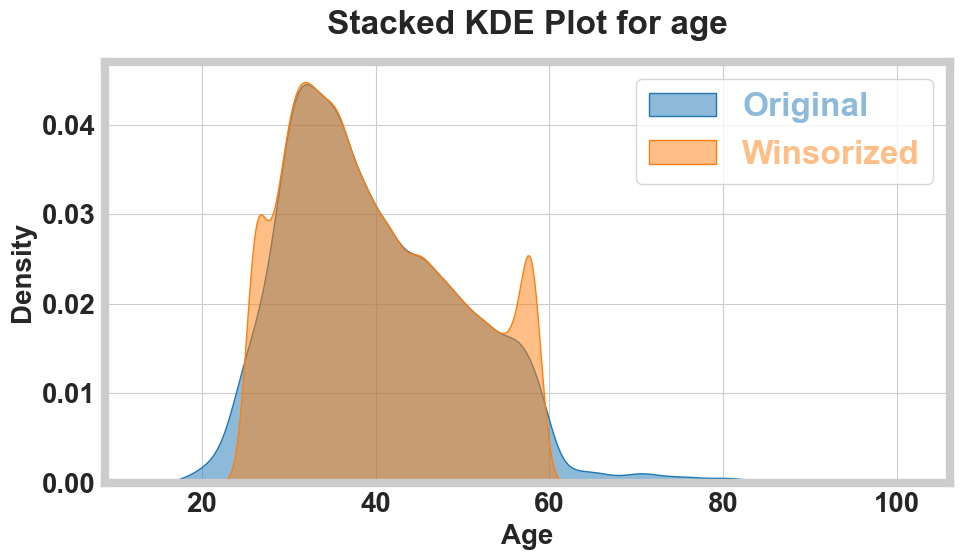

Wilcoxon rank-sum test for 'age': U Statistic: 847937868.5000, P-value: 0.9712
The distributions of 'age' are not significantly different (p >= 0.05).


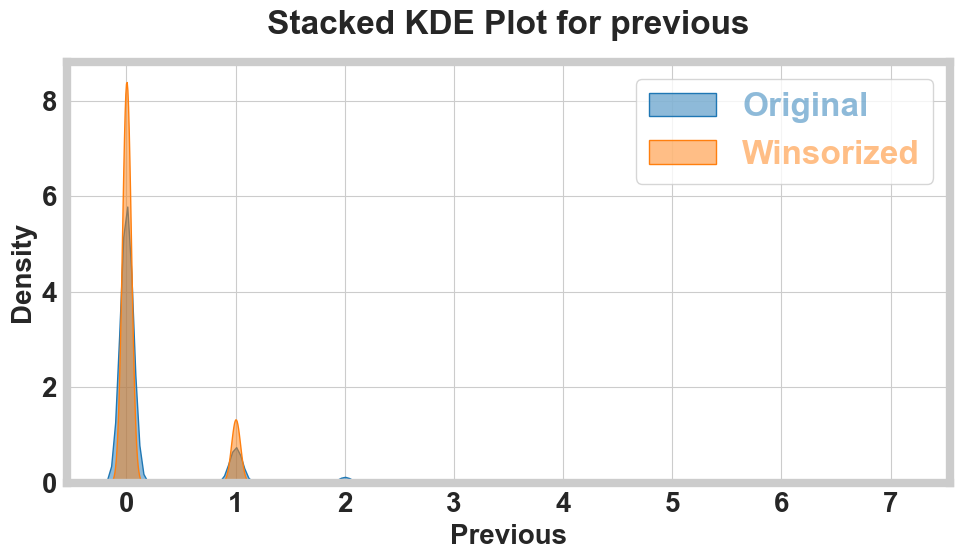

Wilcoxon rank-sum test for 'previous': U Statistic: 851053428.0000, P-value: 0.1407
The distributions of 'previous' are not significantly different (p >= 0.05).


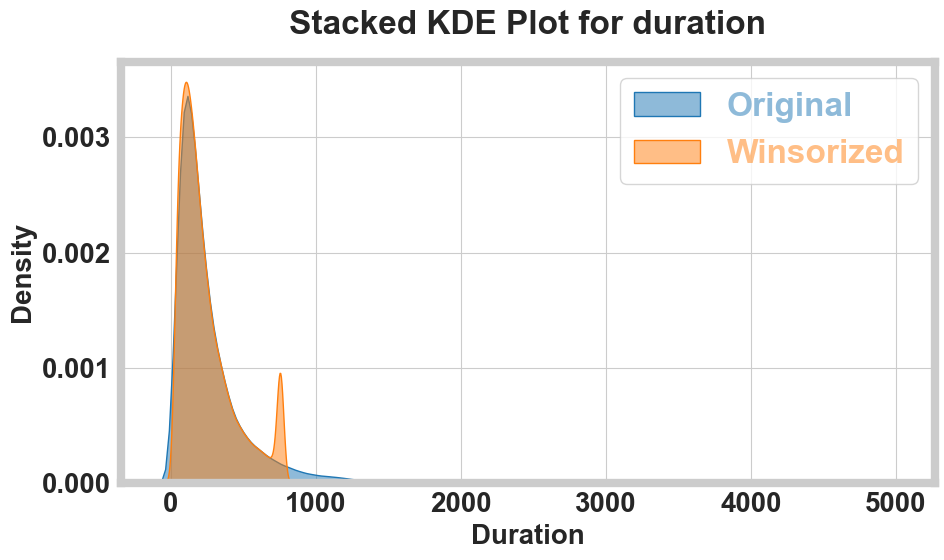

Wilcoxon rank-sum test for 'duration': U Statistic: 848088464.0000, P-value: 0.9936
The distributions of 'duration' are not significantly different (p >= 0.05).


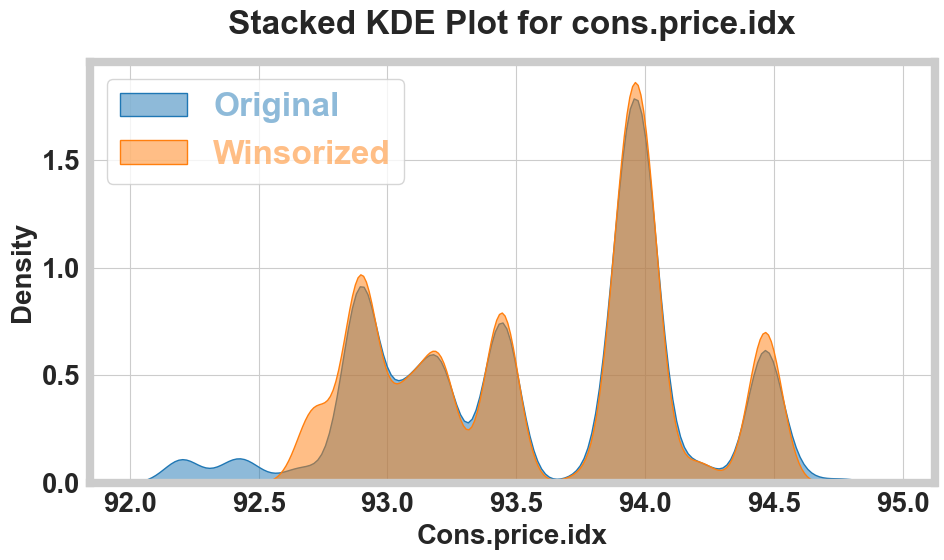

Wilcoxon rank-sum test for 'cons.price.idx': U Statistic: 846630309.5000, P-value: 0.6722
The distributions of 'cons.price.idx' are not significantly different (p >= 0.05).


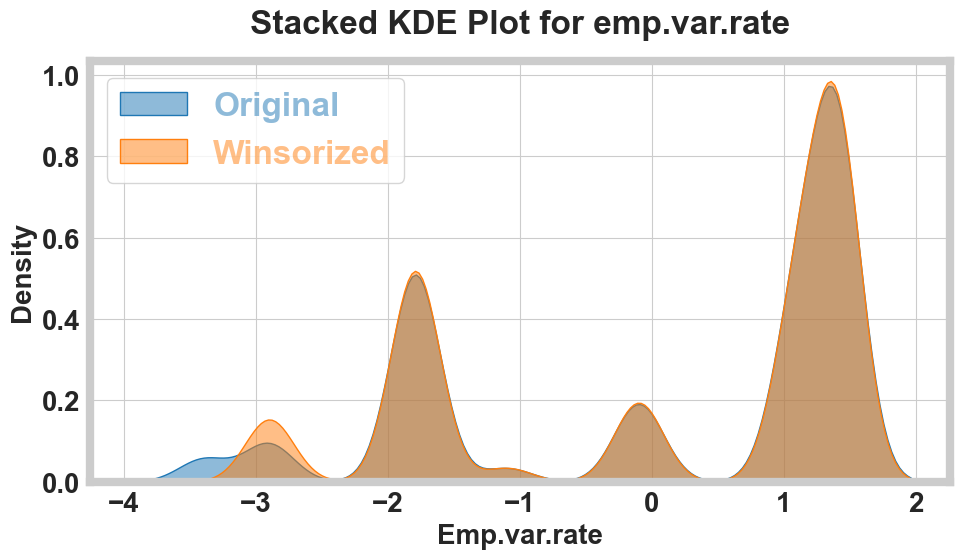

Wilcoxon rank-sum test for 'emp.var.rate': U Statistic: 846254849.0000, P-value: 0.5811
The distributions of 'emp.var.rate' are not significantly different (p >= 0.05).


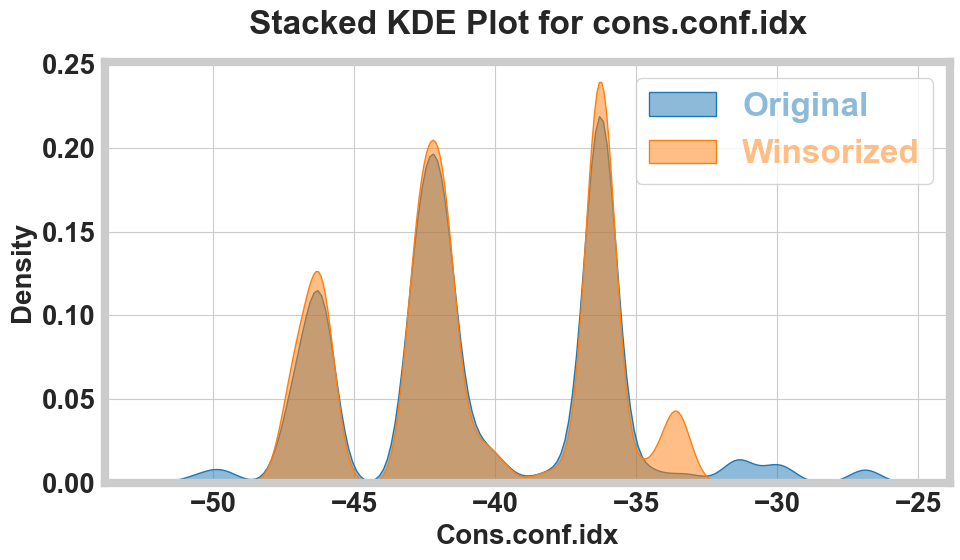

Wilcoxon rank-sum test for 'cons.conf.idx': U Statistic: 849323372.5000, P-value: 0.7089
The distributions of 'cons.conf.idx' are not significantly different (p >= 0.05).


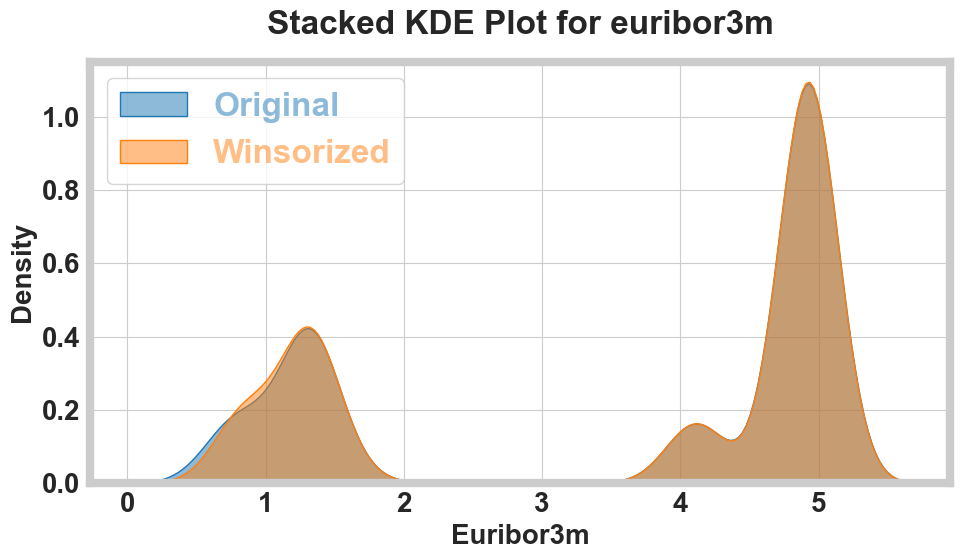

Wilcoxon rank-sum test for 'euribor3m': U Statistic: 848155548.0000, P-value: 0.9779
The distributions of 'euribor3m' are not significantly different (p >= 0.05).


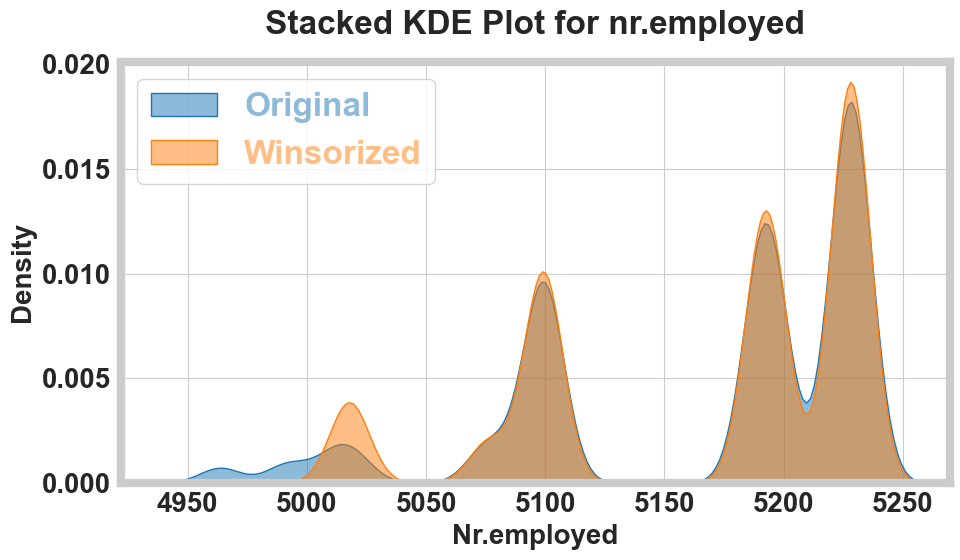

Wilcoxon rank-sum test for 'nr.employed': U Statistic: 844841187.0000, P-value: 0.3258
The distributions of 'nr.employed' are not significantly different (p >= 0.05).


In [332]:
plot_kde_before_after(df, winsorized_df, exclude_columns = ['pdays'])

In [102]:
df.select_dtypes(include = 'object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'Subscription'],
      dtype='object')

### Feature Importance and Correlation

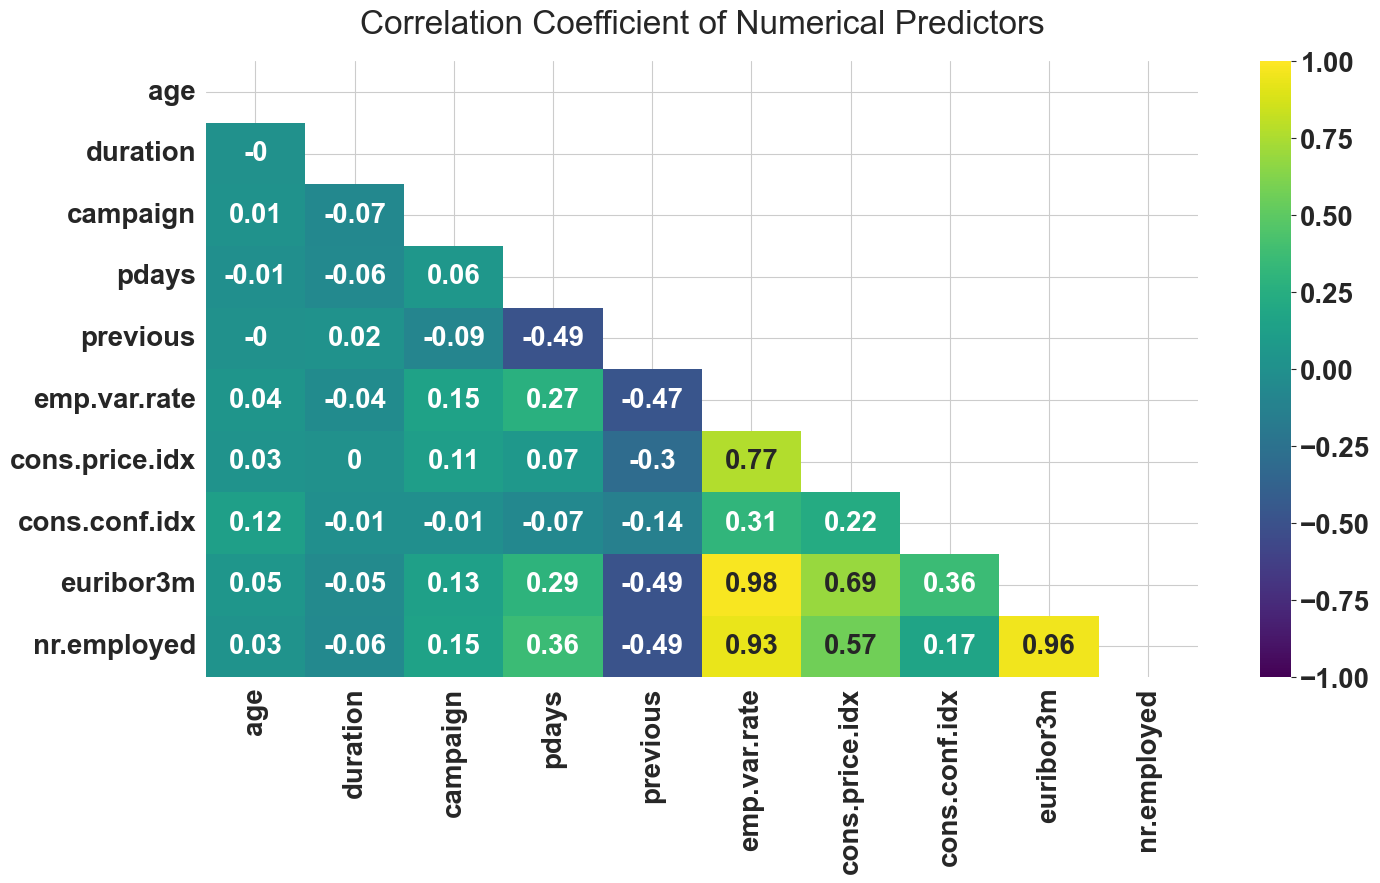

In [103]:
# Calculate the correlation matrix and round to two decimal places
corr_matrix = winsorized_df.select_dtypes(include='number').corr().round(2)

# Generate a mask to only show the bottom triangle
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

# Generate the heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot = True, mask =mask, vmin = -1, vmax = 1, cmap = 'viridis')
plt.title('Correlation Coefficient of Numerical Predictors')
plt.show()

#### How do we remove above highly correlated features?
Eliminating features wantonly runs the risk of removing too much important information, which is detrimental to your efforts for building a reliable model. Let use VIF for above numeric columns.

In [104]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(df):
    
    X = df.select_dtypes(include = 'number')
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [105]:
# Criterion: Remove variables with VIF >= 5.0
compute_vif(winsorized_df)

,Variable,VIF
0,age,1.014473
1,duration,1.013629
2,campaign,1.040797
3,pdays,1.453027
4,previous,1.597798
5,emp.var.rate,34.874531
6,cons.price.idx,4.979912
7,cons.conf.idx,2.889608
8,euribor3m,68.186368
9,nr.employed,40.106793


In [106]:
# Drop multicollinear features
winsorized_df.drop(columns = ['emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed'], inplace = True)

In [107]:
"""Positive value means the distribution is skewed to the right.
Negative value means the distribution is skewed to the left.
0 means perfect normal distribution. The bell shaped curve.
"""
winsorized_df.select_dtypes(include = 'number').skew().sort_values(ascending=False)

previous         2.116628
campaign         1.453000
duration         1.300986
age              0.414294
cons.conf.idx    0.007910
pdays           -4.921922
dtype: float64

In [108]:
# Encode categorical features
winsorized_df.select_dtypes(include = 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,Subscription
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41179,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41180,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41181,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41182,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


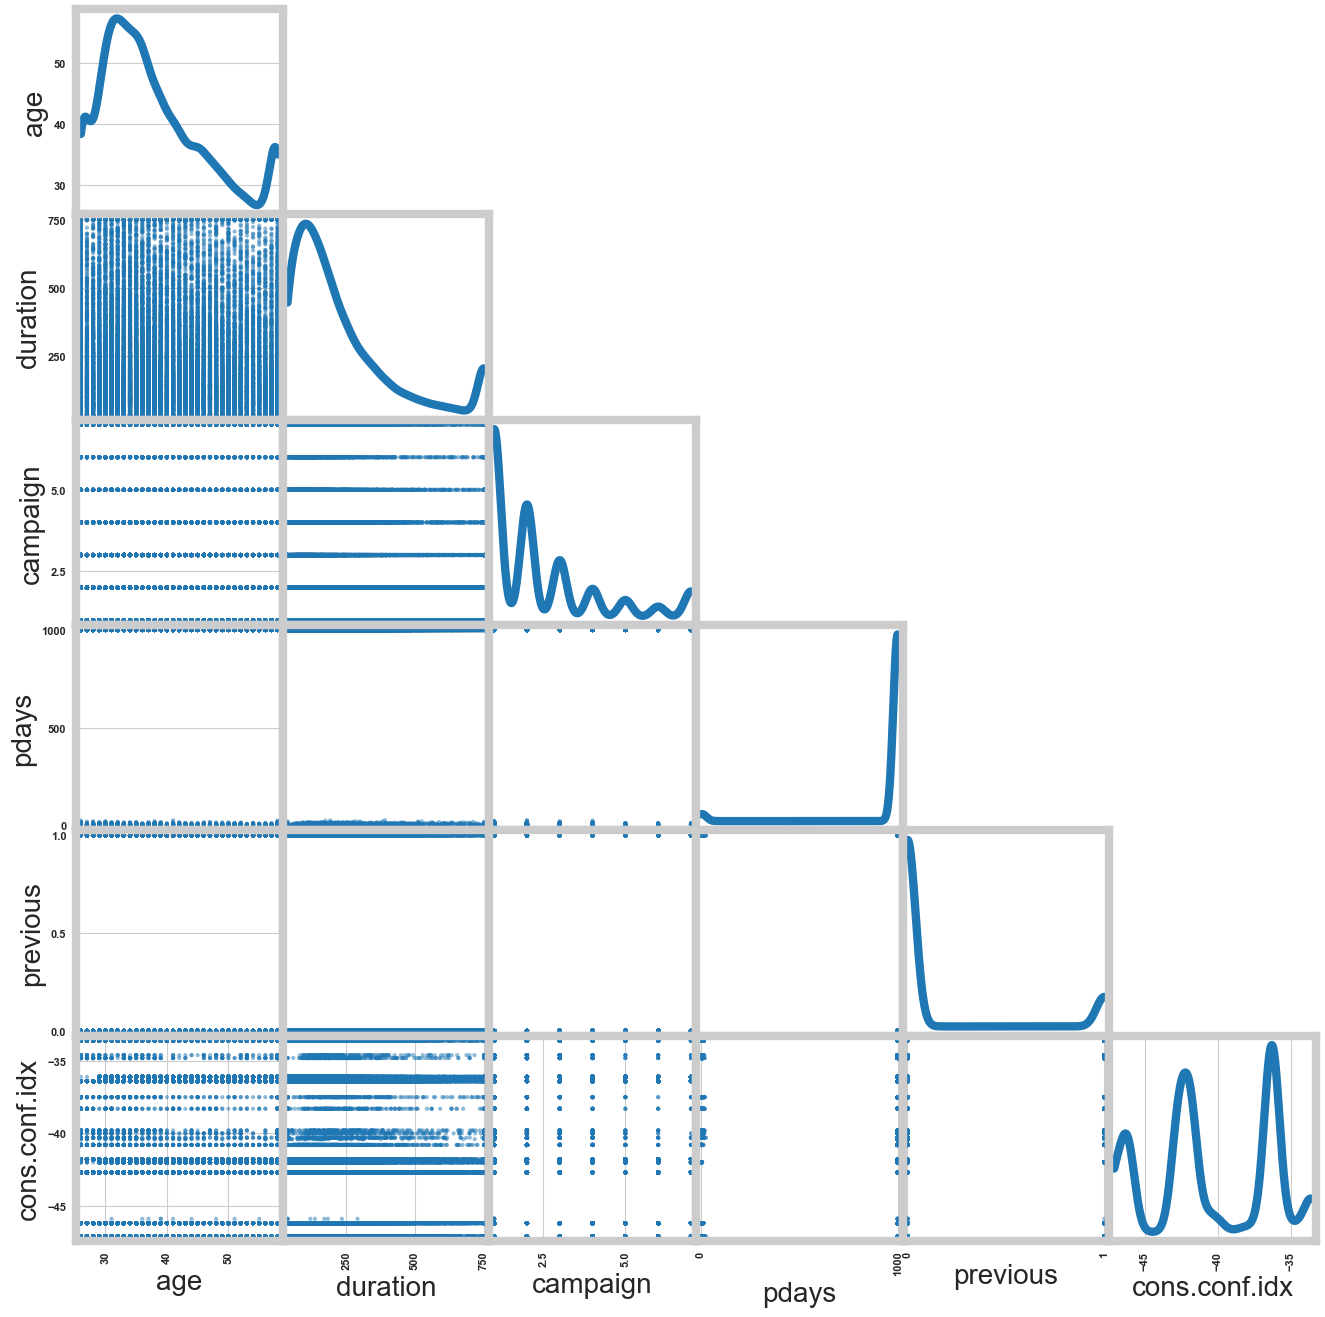

In [109]:
# Create scatter matrix plot
scatter_matrix = pd.plotting.scatter_matrix(winsorized_df, alpha=0.5, figsize=(16, 16), diagonal='kde')

# Hide the upper triangle
for i, j in zip(*np.triu_indices_from(scatter_matrix, 1)):
    scatter_matrix[i, j].set_visible(False)

plt.show()

In [110]:
winsorized_df['Subscription'] = winsorized_df['Subscription'].map({'yes': 1, 'no': 0})

In [337]:
winsorized_df['Subscription'].value_counts(normalize = True)

Subscription
no     0.887335
yes    0.112665
Name: proportion, dtype: float64

#### Categorical Feature Modification
If more than three categories and some are sparse, mold sparses into 'other' categories. If three categories and one is sparse, imput with max frequency.

In [111]:
def replace_small_categories_with_mode(df, column, threshold = None):
    # Lets make a df copy
    df_copy = df.copy()

    # Calculate the proportions of each category
    category_proportions = df_copy[column].value_counts(normalize = True)
    
    if threshold is None:
        # Identify the category with the smallest proportion
        smallest_category = category_proportions.idxmin()
        small_categories = [smallest_category]
    else:
        # Identify small categories based on the given threshold
        small_categories = category_proportions[category_proportions <= threshold].index
    
    # Find the most frequent category
    most_frequent_category = category_proportions.idxmax()
    
    # Replace small categories with the most frequent category if number of 
    # categories in geater than 2
    if len(category_proportions) > 2:
        df_copy[column] = df_copy[column].map(lambda x: most_frequent_category if 
        x in small_categories else x)
    
    return df_copy

In [112]:
# mutate for categorical column where it has three categories and one is rare (< 1% or so)
mutate_with_mode = ['housing', 'default', 'loan', 'marital']

for col in mutate_with_mode:
    winsorized_df = replace_small_categories_with_mode(winsorized_df, column = col)

Wherever we have less than x% for each feature, categorize that into 'others'.

In [113]:
def merge_small_categories(df, column, threshold = 0.05, min_categories = 4, categories_under_threshold = 2):
    """
    Replace categories in a given column with 'Others' if they account for less than the specified 
    threshold and if the total number of unique categories is greater than the specified number and 
    at least two categories have a normalized value less than the threshold.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the column.
    column (str): The name of the column to process.
    threshold (float): The threshold for the minimum proportion of each category (default is 0.05).
    min_categories (int): The minimum number of unique categories required to consider replacing 
    small categories (default is 4).
    categories_under_threshold (int): The minimum number of categories that must have a normalized value 
    less than the threshold to trigger the replacement (default is 2).
    
    Returns:
    pd.DataFrame: The DataFrame with small categories replaced by 'Others'.
    """
    # Lets create a copy
    df_copy = df.copy(deep = True)

    # Calculate the proportion of each category
    category_proportions = df_copy[column].value_counts(normalize = True)
    
    # Identify small categories
    small_categories = category_proportions[category_proportions < threshold].index
    
    # Check if the total number of unique categories is greater than the specified number
    if len(category_proportions) >= min_categories:
        # Check if at least the specified number of categories have a normalized value less than the threshold
        if (category_proportions < threshold).sum() >= categories_under_threshold:
            # Replace small categories with 'Others' using map and mask
            df_copy[column] = df_copy[column].map(lambda x: 'Others' if x in small_categories else x)
    
    return df_copy

In [114]:
merge_threshold = {
    'job': 0.03,
    'education': 0.05
}

for col, threshold in merge_threshold.items():
    winsorized_df = merge_small_categories(winsorized_df, col, threshold = threshold)

In [115]:
# Mapping dictionary (use Q2, Q3 and write Q1, Q4 as 'Others')
month_to_quarter = {
    'jan': 'Others', 'feb': 'Others', 'mar': 'Others',
    'apr': 'Q2', 'may': 'Q2', 'jun': 'Q2',
    'jul': 'Q3', 'aug': 'Q3', 'sep': 'Q3',
    'oct': 'Others', 'nov': 'Others', 'dec': 'Others'
}

# Lets create a new column called quarters from months
winsorized_df['quarter'] = winsorized_df['month'].map(month_to_quarter)

#### Categorical Features Independence

In [116]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """Calculate Cramér's V for two categorical variables."""
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    minDim = min(confusion_matrix.shape) - 1
    V = np.sqrt((chi2 / n) / minDim)
    return V, p

def filter_weak_associations(df, target):
    """
    Calculate Cramér's V for each categorical feature with the target and return a DataFrame 
    with the column names, Cramér's V values, and p-values.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the features and target.
    target (str): The name of the target column.
    
    Returns:
    pd.DataFrame: A DataFrame with the column names, Cramér's V values, and p-values.
    """
    categorical_columns = df.select_dtypes(include=['object']).columns
    results = []

    for col in categorical_columns:
        if col != target:
            V, p = cramers_v(df[col], df[target])
            results.append({'Column': col, 'Cramér\'s V': V, 'p-value': p})
    
    results_df = pd.DataFrame(results)
    return results_df

results_df = filter_weak_associations(winsorized_df, 'Subscription')
print(results_df)


         Column  Cramér's V        p-value
0           job    0.131109  1.399904e-147
1       marital    0.054133   6.222129e-27
2     education    0.068280   9.538740e-39
3       default    0.099219   3.624164e-90
4       housing    0.011023   2.529191e-02
5          loan    0.004374   3.747513e-01
6       contact    0.144709  1.452825e-189
7         month    0.274401   0.000000e+00
8   day_of_week    0.025188   2.981214e-05
9      poutcome    0.320483   0.000000e+00
10      quarter    0.110048  4.960959e-109


In [117]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """Calculate Cramér's V statistic for categorical-categorical association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, dof, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    cramers_v_value = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
    return cramers_v_value, chi2, p, dof

def cat_feature_associations(df, target=None):
    """
    Calculate Cramér's V for each combination of categorical features and include chi-squared test results.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the features and target.
    target (str, optional): The name of the target column. If provided, calculate associations with the target.
    
    Returns:
    pd.DataFrame: A DataFrame with the column names, Cramér's V values, chi-squared statistic, p-values, and degrees of freedom.
    """
    categorical_columns = df.select_dtypes(include=['object']).columns
    results = []

    if target:
        for col in categorical_columns:
            if col != target:
                V, chi2, p, dof = cramers_v(df[col], df[target])
                results.append({'Column1': col, 'Column2': target, 'Cramér\'s V': V, 
                 'p-value': p, 'Degrees of Freedom': dof})
    else:
        for i, col1 in enumerate(categorical_columns):
            for col2 in categorical_columns[i+1:]:
                V, chi2, p, dof = cramers_v(df[col1], df[col2])
                results.append({'Column1': col1, 'Column2': col2, 
                'Cramér\'s V': V, 'p-value': p, 'Degrees of Freedom': dof})
    
    results_df = pd.DataFrame(results)

    return results_df

# Example usage
results_df = cat_feature_associations(winsorized_df)
print(results_df)

        Column1      Column2  Cramér's V        p-value  Degrees of Freedom
0           job      marital    0.162219   0.000000e+00                  16
1           job    education    0.375667   0.000000e+00                  48
2           job      default    0.203398   0.000000e+00                   8
3           job      housing    0.014034   4.082220e-02                   8
4           job         loan    0.017434   8.544967e-03                   8
5           job      contact    0.118920  2.697262e-122                   8
6           job        month    0.111213   0.000000e+00                  72
7           job  day_of_week    0.014490   3.187223e-04                  32
8           job     poutcome    0.082726  4.680416e-113                  16
9           job      quarter    0.149162   0.000000e+00                  16
10      marital    education    0.141667   0.000000e+00                  12
11      marital      default    0.134578  3.984741e-163                   2
12      mari

In [118]:
cat_feature_associations(winsorized_df, target = 'Subscription')

,Column1,Column2,Cramér's V,p-value,Degrees of Freedom
0,job,Subscription,0.130368,1.399904e-147,8
1,marital,Subscription,0.053683,6.222129e-27,2
2,education,Subscription,0.067205,9.538740e-39,6
3,default,Subscription,0.099097,3.624164e-90,1
4,housing,Subscription,0.009860,2.529191e-02,1
5,loan,Subscription,0.000000,3.747513e-01,1
6,contact,Subscription,0.144626,1.452825e-189,1
7,month,Subscription,0.274006,0.000000e+00,9
8,day_of_week,Subscription,0.023180,2.981214e-05,4
9,poutcome,Subscription,0.320411,0.000000e+00,2


In [119]:
# Since day_of_week has no association with target and we have 
# quarter for month lets drop these two columns
winsorized_df.drop(columns = ['month', 'day_of_week'], inplace = True)

### Model Training, Testing, Validation and Evaluation

In [120]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve,\
roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay, accuracy_score, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
from collections import defaultdict
import time

In [121]:
def one_hot_encode(df):
    """
    Perform one-hot encoding on all categorical features in the DataFrame 
    using sklearn's OneHotEncoder.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the features.
    
    Returns:
    pd.DataFrame: The DataFrame with one-hot encoded columns.
    """
    # Select categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    # Initialize OneHotEncoder with drop='first' to drop the first category
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    
    # Fit and transform the categorical columns
    one_hot_encoded = encoder.fit_transform(df[categorical_columns])
    
    # Create a DataFrame with the one-hot encoded columns
    one_hot_df = pd.DataFrame(one_hot_encoded, columns = encoder.get_feature_names_out(categorical_columns))
    
    # Concatenate the one-hot encoded DataFrame with the original DataFrame
    df_encoded = pd.concat([df.drop(categorical_columns, axis = 1), one_hot_df], axis = 1)
    
    return df_encoded

encoded_df = one_hot_encode(winsorized_df)


In [234]:
# Create features and target from winsorized_df
X = encoded_df.drop(columns = 'Subscription')
y = encoded_df['Subscription']

# Assuming y is your target series and X is your feature DataFrame
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, stratify = y, random_state = 42)
print("Train set size:", len(y_train))
print("Test set size:", len(y_test))

Train set size: 27593
Test set size: 13591


##### Base Model

In [123]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Add a constant to the model (intercept)
X_train_scaled_const = sm.add_constant(X_train_scaled)

# Fit the logistic regression model
logit_model = sm.Logit(y_train, X_train_scaled_const).fit()

# Extract p-values
p_values = logit_model.pvalues

# Identify significant coefficients (e.g., p-value < 0.05)
significant_coeffs = p_values[p_values < 0.05]

print("Significant coefficients:")
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.227658
         Iterations 8
Significant coefficients:
                           Logit Regression Results                           
Dep. Variable:           Subscription   No. Observations:                27593
Model:                          Logit   Df Residuals:                    27563
Method:                           MLE   Df Model:                           29
Date:                Fri, 13 Sep 2024   Pseudo R-squ.:                  0.3534
Time:                        14:42:29   Log-Likelihood:                -6281.8
converged:                       True   LL-Null:                       -9714.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0206      0.035    -86.736      0.000      -3.089      -2.952
x1 

In [124]:
# Extract the summary table as a DataFrame
summary = logit_model.summary()
summary_as_html = summary.tables[1].as_html()
summary_df = pd.read_html(summary_as_html, header=0, index_col=0)[0]

# Replace the index with your column names
summary_df.index = ['const'] + list(X_train.columns)

summary_desired = summary_df.iloc[:, [0, 3]]
print(summary_desired)

                                 coef  P>|z|
const                         -3.0206  0.000
age                           -0.0225  0.438
duration                       1.2387  0.000
campaign                      -0.1330  0.000
pdays                         -0.3615  0.000
previous                       0.0392  1.000
cons.conf.idx                  0.3046  0.000
job_admin.                    -0.1479  0.000
job_blue-collar               -0.2834  0.000
job_entrepreneur              -0.1375  0.000
job_management                -0.1244  0.000
job_retired                    0.1166  0.000
job_self-employed             -0.1131  0.000
job_services                  -0.1827  0.000
job_technician                -0.1955  0.000
marital_married                0.0293  0.449
marital_single                 0.1442  0.000
education_basic.4y            -0.1180  0.004
education_basic.6y            -0.0878  0.015
education_basic.9y            -0.2065  0.000
education_high.school         -0.1866  0.000
education_

In [125]:
drop_columns = summary_desired[summary_desired.iloc[:, 1] > 0.05]
print(drop_columns)

                        coef  P>|z|
age                  -0.0225  0.438
previous              0.0392  1.000
marital_married       0.0293  0.449
housing_yes          -0.0034  0.885
loan_yes             -0.0091  0.700
poutcome_nonexistent -0.0392  1.000


In [380]:
import pickle
def save_model_results(fitted_model: str, file_name: str) -> None:
    filename = file_name + '.pkl'
    outfile = open(filename, 'wb')
    pickle.dump(fitted_model, outfile)
    outfile.close()

The coefficients for age, previous, marital_married, housing_yes, loan_yes, and poutcome_nonexistent are not significant as their p-values are greater than 0.05.

In [126]:
# dropping based on logistic model and earlier EDA
X_train_new = X_train.drop(columns = ['poutcome_nonexistent', 'previous', 'poutcome_nonexistent', 'loan_yes', 'housing_yes'])
X_test_new = X_test.drop(columns = ['poutcome_nonexistent', 'previous', 'poutcome_nonexistent', 'loan_yes', 'housing_yes'])

logit = Pipeline([('scalar', StandardScaler()),
                  ('model', LogisticRegression(class_weight= 'balanced', solver = 'liblinear'))
])

logit.fit(X_train_new, y_train)

Pipeline(steps=[('scalar', StandardScaler()),
                ('model',
                 LogisticRegression(class_weight='balanced',
                                    solver='liblinear'))])

In [127]:
logit.score(X_train_new, y_train)

0.8380023919109919

In [128]:
logit.score(X_test_new, y_test)

0.8371716577146641

In [129]:
f1_score(y_test, logit.predict(X_test_new))

0.5266310160427807

In [130]:
# Extract the logistic regression model from the pipeline
logistic_model = logit.named_steps['model']

# Get the coefficients and exponentiate them to get the odds ratios
coefficients = np.exp(logistic_model.coef_[0])

# Create a Pandas Series with the column names
coeff_series = pd.Series(coefficients, index = X_train_new.columns).sort_values(ascending = False)

print(coeff_series)

duration                         4.083134
cons.conf.idx                    1.303855
marital_single                   1.217608
job_retired                      1.131619
poutcome_success                 1.103586
marital_married                  1.069439
age                              0.985857
education_university.degree      0.890942
education_basic.6y               0.883343
education_professional.course    0.878864
education_basic.4y               0.864150
job_self-employed                0.857977
job_entrepreneur                 0.844530
campaign                         0.842517
job_management                   0.841140
education_high.school            0.809524
job_admin.                       0.787484
quarter_Q2                       0.785213
education_basic.9y               0.771644
job_services                     0.770938
job_technician                   0.766308
default_unknown                  0.686629
job_blue-collar                  0.677874
pdays                            0

Text(0.5, 1.0, 'Feature Importance Using Logistic Regression')

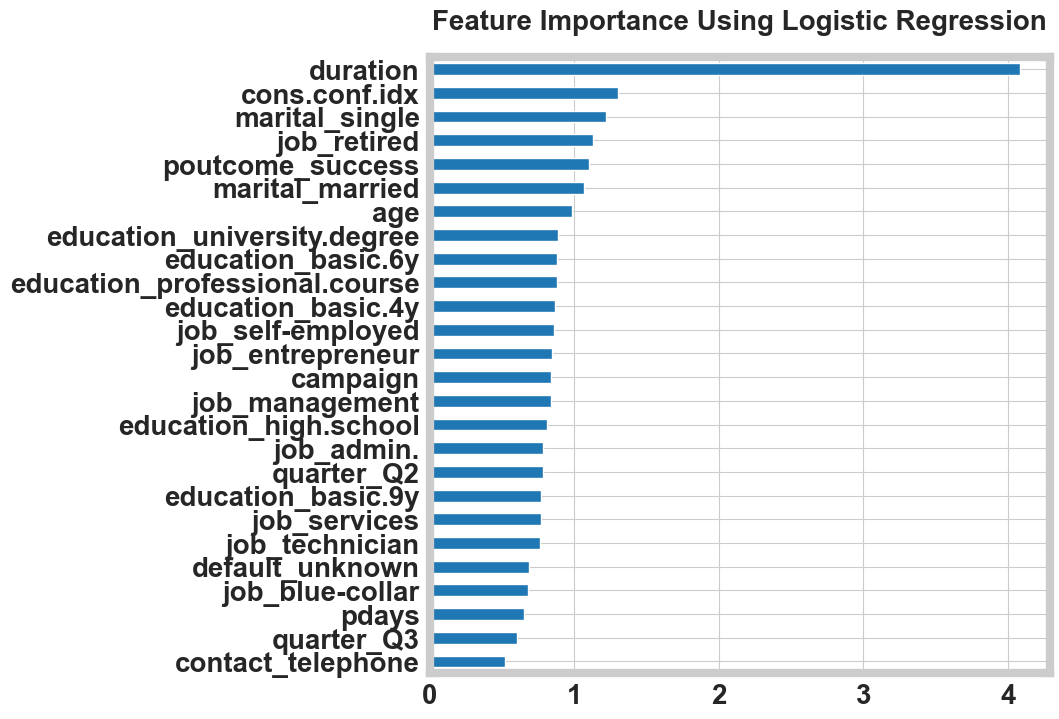

In [336]:
plt.figure(figsize = (8, 8))
coeff_series.sort_values().plot.barh()
plt.title("Feature Importance Using Logistic Regression", fontdict= {'fontweight':'bold', 'fontsize': 20})

#### LogisticRegression, RandomForestClassifier, SVMClassifier, KNeighborsClassifier, XGBoostClassifier

In [381]:
# Define the models with class_weight = 'balanced'
models = {
    'logistic': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(max_iter = 1000, class_weight='balanced'))
    ]),
    'randomForest': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(class_weight='balanced', max_depth = 7))
    ]),
    'svm': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', SVC(probability = True, class_weight='balanced'))
    ]),
    'knn': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier(n_neighbors=5))
    ]),
    'xgboost': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', XGBClassifier(use_label_encoder = False, eval_metric = 'logloss', scale_pos_weight = 1))
    ])
}

# Initialize the scores dictionary using defaultdict
scores = defaultdict(list)

# Train and evaluate each model
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train_new, y_train)
    end_time = time.time()
    y_train_pred = model.predict(X_train_new)
    y_test_pred = model.predict(X_test_new)
    y_test_proba = model.predict_proba(X_test_new)[:, 1]
    save_model_results(model, name)
    scores['model'].append(name)
    scores['train_time_sec'].append(end_time - start_time)
    scores['train_score'].append(model.score(X_train_new, y_train))
    scores['test_score'].append(model.score(X_test_new, y_test))
    scores['train_precision'].append(precision_score(y_train, y_train_pred))
    scores['test_precision'].append(precision_score(y_test, y_test_pred))
    scores['train_recall'].append(recall_score(y_train, y_train_pred))
    scores['test_recall'].append(recall_score(y_test, y_test_pred))
    scores['test_f1_score'].append(f1_score(y_test, y_test_pred))
    scores['test_roc_auc_score'].append(roc_auc_score(y_test, y_test_proba))

# Convert scores to DataFrame for better visualization
scores_df = pd.DataFrame(scores)
print(scores_df)

          model  train_time_sec  train_score  test_score  train_precision  \
0      logistic        0.208054     0.838147    0.837098         0.393368   
1  randomForest        1.158987     0.849418    0.847399         0.419140   
2           svm      107.990766     0.845287    0.836142         0.414931   
3           knn        0.075566     0.924945    0.896991         0.751210   
4       xgboost        0.369070     0.953865    0.910308         0.850114   

   test_precision  train_recall  test_recall  test_f1_score  \
0        0.391415      0.805082     0.804050       0.526518   
1        0.414055      0.871985     0.854344       0.557783   
2        0.395746      0.909939     0.862835       0.542617   
3        0.570354      0.499196     0.346832       0.431357   
4        0.623613      0.716951     0.514043       0.563552   

   test_roc_auc_score  
0            0.901698  
1            0.925052  
2            0.914363  
3            0.836306  
4            0.940042  


In [386]:
def load_model(file_name: str) -> Any:
    with open(file_name, 'rb') as infile:
        loaded_model = pickle.load(infile)
    return loaded_model

In [387]:
# Example how to load saved pkl file
load_model('logistic.pkl')

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [154]:
# Fine tuning xgboost model

# Define parameter grid
params_dict = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

# Set up Stratified K-Fold cross-validation
folds = 5
skf = StratifiedKFold(n_splits = folds, shuffle = True, random_state = 42)

# Initialize XGBoost classifier
xgb = XGBClassifier(use_label_encoder = False, eval_metric = 'logloss', scale_pos_weight = 1)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator = xgb, param_grid = params_dict, scoring = 'roc_auc', cv = skf, verbose = 3, n_jobs = -1)

# Measure training time
start_time = time.time()
grid_search.fit(X_train_new, y_train)
end_time = time.time()
training_time = end_time - start_time

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best ROC AUC score: {best_score}")
print(f"Training time: {training_time} seconds")

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Best parameters: {'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 4, 'min_child_weight': 5, 'subsample': 1.0}
Best ROC AUC score: 0.9429900594197335
Training time: 237.6044373512268 seconds


In [155]:
# Fit XGBoost model with best parameters
best_xgb = XGBClassifier(**best_params, use_label_encoder = False, eval_metric = 'logloss')
best_xgb.fit(X_train_new, y_train)

# Evaluate model
y_train_pred = best_xgb.predict(X_train_new)
y_test_pred = best_xgb.predict(X_test_new)
y_test_proba = best_xgb.predict_proba(X_test_new)[:, 1]

print("Training Metrics:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Precision: {precision_score(y_train, y_train_pred)}")
print(f"Recall: {recall_score(y_train, y_train_pred)}")
print(f"F1 Score: {f1_score(y_train, y_train_pred)}")
print(f"ROC AUC: {roc_auc_score(y_train, best_xgb.predict_proba(X_train_new)[:, 1])}")

print("\nTesting Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(f"Precision: {precision_score(y_test, y_test_pred)}")
print(f"Recall: {recall_score(y_test, y_test_pred)}")
print(f"F1 Score: {f1_score(y_test, y_test_pred)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_test_proba)}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Training Metrics:
Accuracy: 0.9219004820063059
Precision: 0.6956521739130435
Recall: 0.545513026696687
F1 Score: 0.6115017126374617
ROC AUC: 0.9518341948679543

Testing Metrics:
Accuracy: 0.9108969170774778
Precision: 0.6333333333333333
Recall: 0.496407576747224
F1 Score: 0.5565726839985353
ROC AUC: 0.9446593236733815

Confusion Matrix:
[[11620   440]
 [  771   760]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12060
           1       0.63      0.50      0.56      1531

    accuracy                           0.91     13591
   macro avg       0.79      0.73      0.75     13591
weighted avg       0.90      0.91      0.91     13591



In [388]:
# save_model_results(best_xgb, 'best_xgb')

In [291]:
# fit a base model for voting classifier
vc = VotingClassifier(estimators=[
    ('logistic', models['logistic']),
    ('randomForest', models['randomForest']),
    ('xgboost', models['xgboost'])
], voting='soft')  # Use 'hard' for majority voting

skf = StratifiedKFold(n_splits = 5, shuffle = True)
cvm = cross_val_score(vc, X_train_new, y_train, cv = skf)
base_score = cvm.mean()
base_std = cvm.std()

print('\n')
print(f'The average base cross-validation score is {round(base_score, 4)} (+- {round(base_std, 4)})')




The average base cross-validation score is 0.8892 (+- 0.0057)


In [367]:
# prob for class 1
p = best_xgb.predict_proba(X_test_new)[:, 1]

# Create a DataFrame with the probabilities
pred_df = X_test_new.copy()
pred_df['p'] = p

# Sort the DataFrame by probability
pred_df = pred_df.sort_values(by='p', ascending=False)

# Define thresholds for categorizing groups
high_prob_threshold = 0.8
medium_prob_threshold = 0.5

# Categorize customers into groups
pred_df['group'] = pd.cut(pred_df['p'], bins=[0.3, medium_prob_threshold, high_prob_threshold, 1], labels = ['Low', 'Medium', 'High'])

# Analyze the groups
high_prob_group = pred_df[pred_df['group'] == 'High']
medium_prob_group = pred_df[pred_df['group'] == 'Medium']
low_prob_group = pred_df[pred_df['group'] == 'Low']

# Print the number of customers in each group
print(f"High Probability Group: {len(high_prob_group)} customers")
print(f"Medium Probability Group: {len(medium_prob_group)} customers")
print(f"Low Probability Group: {len(low_prob_group)} customers")


High Probability Group: 258 customers
Medium Probability Group: 942 customers
Low Probability Group: 901 customers


In [370]:
X.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.conf.idx',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_technician',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_professional.course', 'education_university.degree',
       'default_unknown', 'housing_yes', 'loan_yes', 'contact_telephone',
       'poutcome_nonexistent', 'poutcome_success', 'quarter_Q2', 'quarter_Q3'],
      dtype='object')

In [372]:
high_prob_group['poutcome_success'].value_counts()

poutcome_success
1.0    180
0.0     78
Name: count, dtype: int64

Let’s use the GridSearchCV to find the best parameters and the best score. According to the sklearn documentation: If the voting is set to ‘hard,’ the majority voting rule will be used. If we use the voting is set to “soft,” the argmax of the sums of the predicted probabilities will be used, and this method is recommended for an ensemble of well-calibrated classifiers.

In [292]:
params_dict = {'voting': ['soft'],
                'weights': [(1, 1, 1), (2, 1, 1), 
                            (1, 2, 1), (1, 1, 2), 
                            (2, 2, 1), (1, 2, 2), 
                            (2, 1, 2), (2, 2, 2)]}


gs = GridSearchCV(estimator = vc, param_grid = params_dict)

#fit gridsearch & print best params
grid = GridSearchCV(vc, params_dict)
grid.fit(X_train_new, y_train)
print('\n')
print(f'The best params is : {grid.best_params_}')



The best params is : {'voting': 'soft', 'weights': (1, 1, 2)}


In [293]:
# print the final vc score
tuned_vc = VotingClassifier(estimators = [
    ('logistic', models['logistic']),
    ('randomForest', models['randomForest']),
    ('xgboost', models['xgboost'])],
    **grid.best_params_, n_jobs = -1)  

tuned_cvm = cross_val_score(tuned_vc, X_train_new, y_train)
tuned_score = tuned_cvm.mean()
tuned_std = tuned_cvm.std()
print('\n')
print(f'The average tuned cross-validation score is {round(tuned_score, 4)} (+- {round(tuned_std, 4)})')



The average tuned cross-validation score is 0.9021 (+- 0.0053)


In [294]:
# fit tuned_vc
tuned_vc.fit(X_train_new, y_train)

# Evaluate model
y_train_pred = tuned_vc.predict(X_train_new)
y_test_pred = tuned_vc.predict(X_test_new)
y_test_proba = tuned_vc.predict_proba(X_test_new)[:, 1]

print("Training Metrics:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Precision: {precision_score(y_train, y_train_pred)}")
print(f"Recall: {recall_score(y_train, y_train_pred)}")
print(f"F1 Score: {f1_score(y_train, y_train_pred)}")
print(f"ROC AUC: {roc_auc_score(y_train, best_xgb.predict_proba(X_train_new)[:, 1])}")

print("\nTesting Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(f"Precision: {precision_score(y_test, y_test_pred)}")
print(f"Recall: {recall_score(y_test, y_test_pred)}")
print(f"F1 Score: {f1_score(y_test, y_test_pred)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_test_proba)}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Training Metrics:
Accuracy: 0.9295835900409524
Precision: 0.6487244897959183
Recall: 0.8179478932132519
F1 Score: 0.7235737658272869
ROC AUC: 0.9518341948679543

Testing Metrics:
Accuracy: 0.9009638731513502
Precision: 0.5466464952092789
Recall: 0.7080339647289353
F1 Score: 0.6169607285145133
ROC AUC: 0.9354560205720797

Confusion Matrix:
[[11161   899]
 [  447  1084]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94     12060
           1       0.55      0.71      0.62      1531

    accuracy                           0.90     13591
   macro avg       0.75      0.82      0.78     13591
weighted avg       0.91      0.90      0.91     13591



In [389]:
# save_model_results(tuned_vc, 'tuned_vc')

####  Model Evaluation using Accuracy, Precision, F1-Score, AUC-ROC

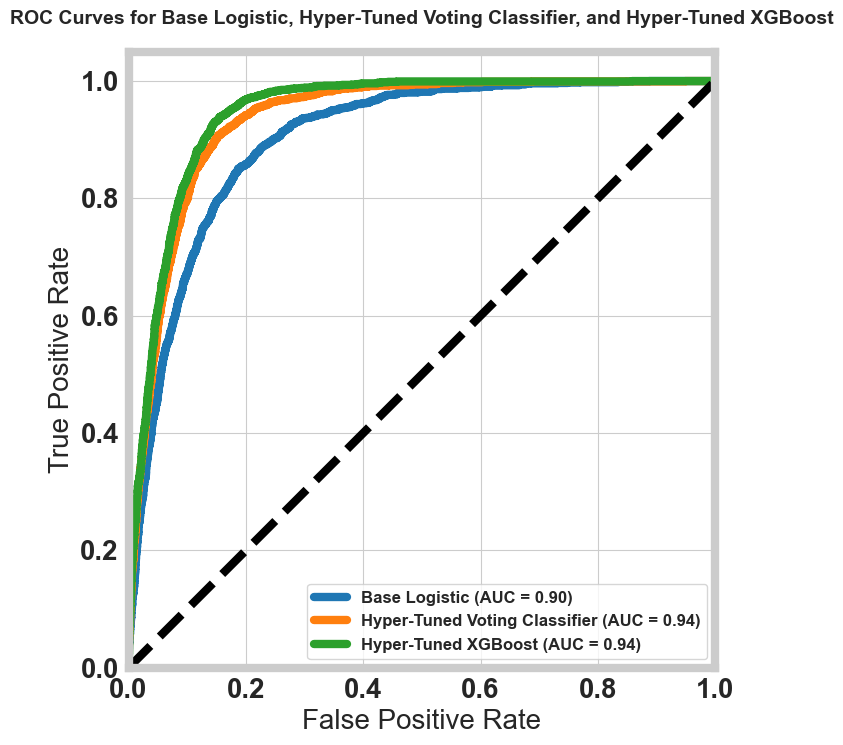

In [373]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Create a larger figure
fig, ax = plt.subplots(figsize=(12, 8))

# Base Logistic Model
RocCurveDisplay.from_estimator(logit, X_test_new, y_test, name='Base Logistic', ax=ax)

# Hyper-Tuned Voting Classifier
RocCurveDisplay.from_estimator(tuned_vc, X_test_new, y_test, name='Hyper-Tuned Voting Classifier', ax=ax)

# Hyper-Tuned XGBoost Model
RocCurveDisplay.from_estimator(best_xgb, X_test_new, y_test, name='Hyper-Tuned XGBoost', ax=ax)

# Plot diagonal line
ax.plot([0, 1], [0, 1], 'k--')

# Set limits and labels
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves for Base Logistic, Hyper-Tuned Voting Classifier, \
and Hyper-Tuned XGBoost', fontdict={'weight': 'bold', 'size': 14})

# Customize legend
ax.legend(loc='lower right', fontsize=12)

# Show plot
plt.show()



## Optimal Threshold Tuning

There are many techniques that are available to address imbalanced classes in machine learning classification problem, such as downsampling majority, upsampling minority (SMOTE) and use balanced weight while training models. Nevertheless, the most simplest yet overlooked approach is to change the decision threshold. The default decison threshold is 0.5. In his 2000 article titled “Machine Learning from Imbalanced Data Sets 101,” Foster Provost famously stated, “The bottom line is that when studying problems with imbalanced data, using the classifiers produced by standard machine learning algorithms without adjusting the output threshold may well be a critical mistake [3].”

### Example: Customer Subscription to Term Deposits

In a classification problem where we predict whether a customer will subscribe to a term deposit, the cost of misclassifying customers who do subscribe is high. Therefore, we want to minimize these misclassifications. In our dataset, the positive class (customers who subscribe) is a minority, comprising only 13%.

There are several reasons to consider an alternative to the default decision threshold:

1. **ROC Curves**: 
   - ROC curves help analyze the predicted probabilities of a model.
   - ROC AUC scores are used to compare and select models.
   - If you require crisp class labels, how do you choose the threshold on the ROC Curve that balances the true positive rate and the false positive rate?

2. **Precision-Recall Curves**:
   - Precision-recall curves analyze the predicted probabilities of a model.
   - Precision-recall AUC is used to compare and select models.
   - If you require crisp class labels, how do you choose the threshold on the Precision-Recall Curve that balances precision and recall?

3. **Probability-Based Metrics**:
   - Metrics like log loss (cross-entropy) are used to train, evaluate, and compare models.
   - If you require crisp class labels, how do you choose the optimal threshold from predicted probabilities?

4. **Cost Matrix**:
   - Different costs may be associated with false positive and false negative misclassifications.
   - You may use cost-insensitive models and later evaluate their predictions using a cost-sensitive measure.
   - How do you choose a threshold that finds the best trade-off for predictions using the cost matrix?


A popular way to train a cost-sensitive classifier without a known cost matrix is to modify the classification outputs when making predictions on new data. This is usually done by setting a threshold on the positive class, below which the negative class is predicted. The value of this threshold is optimized using a validation set, allowing the cost matrix to be learned from the training data.

The answer to these questions is to search a range of threshold values to find the best one. In some cases, the optimal threshold can be calculated directly.

Tuning or shifting the decision threshold to accommodate the broader requirements of the classification problem is generally referred to as “threshold-moving,” “threshold-tuning,” or simply “thresholding.”




## Optimal Threshold for ROC Curve

A ROC curve is a diagnostic plot that evaluates a set of probability predictions made by a model on a test dataset. Different thresholds are used to interpret the true positive rate and the false positive rate of the predictions on the positive (minority) class, and these scores are plotted to create the curve.

The false-positive rate is plotted on the x-axis and the true positive rate on the y-axis. A diagonal line from the bottom-left to top-right indicates a no-skill classifier, while a point in the top left indicates a model with perfect skill.

The ROC curve helps understand the trade-off between the true-positive rate and false-positive rate for different thresholds. The area under the ROC Curve (ROC AUC) provides a single number to summarize the model's performance, ranging from 0.5 (no-skill) to 1.0 (perfect skill).

If crisp class labels are required, an optimal threshold is needed. This threshold is the point on the curve closest to the top-left.


## Optimal Threshold for Precision-Recall Curve

A precision-recall curve focuses on the performance of a classifier on the positive (minority) class.

- **Precision**: Ratio of true positives to the sum of true and false positives. It measures how well the model predicts the positive class.
- **Recall**: Ratio of true positives to the sum of true positives and false negatives. It is the same as sensitivity.

The precision-recall curve is created by calculating precision and recall for various thresholds (unique predict probabilities in test set) and plotting recall on the x-axis and precision on the y-axis. 

- **No-Skill Model**: Represented by a horizontal line at the precision level of the positive class ratio.
- **Perfect Skill Classifier**: Represented by a point in the top-right corner with full precision and recall.

Using the same model and dataset, we can evaluate a  selected model's probability predictions with a precision-recall curve. The `precision_recall_curve()` function calculates the curve, returning precision and recall scores for each threshold.


In [347]:
# Predict probabilities for the positive class
y_probs = best_xgb.predict_proba(X_test_new)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Calculate f score for each threshold
f_score = 2 * precision * recall / (precision + recall)

# Filter out NaN values
valid_indices = ~np.isnan(f_score)
f_score_valid = f_score[valid_indices]
precision_valid = precision[valid_indices]
recall_valid = recall[valid_indices]

# Since thresholds has one less element, we need to adjust the valid_indices for thresholds
thresholds_valid = thresholds[valid_indices[:-1]]

# Find idx for maximum f-score
f_idxmax = f_score_valid.argmax()

# Find threshold corresponding to max f_score
optimized_threshold = thresholds_valid[f_idxmax]

# Training accuracy
test_predictions = (y_probs >= threshold).astype(int)
accuracy = accuracy_score(y_test, test_predictions)

# Print max f_score and optimized threshold
print(f"Maximized f_score: {f_score_valid.max()}")
print(f"Optimized precision: {precision_valid[f_idxmax]}")
print(f"Optimized recall: {recall_valid[f_idxmax]}")
print(f"Optimized threshold: {optimized_threshold}")
print(f"Test accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_probs)}")


Maximized f_score: 0.6450204638472031
Optimized precision: 0.5538894095595126
Optimized recall: 0.7720444154147615
Optimized threshold: 0.2910175919532776
Test accuracy: 0.9042748877933927
ROC-AUC: 0.9446593236733815


In [344]:
# Predict probabilities
probabilities = best_xgb.predict_proba(X_train_new)[:, 1]

# Apply threshold
threshold = optimized_threshold
predictions = (probabilities >= threshold).astype(int)

# Calculate metrics
precision = precision_score(y_train, predictions)
recall = recall_score(y_train, predictions)
f1 = f1_score(y_train, predictions)
accuracy = accuracy_score(y_train, predictions)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Accuracy: {accuracy}')


Precision: 0.571062441752097
Recall: 0.7883563846896108
F1 Score: 0.6623429266315363
Accuracy: 0.909433551987823


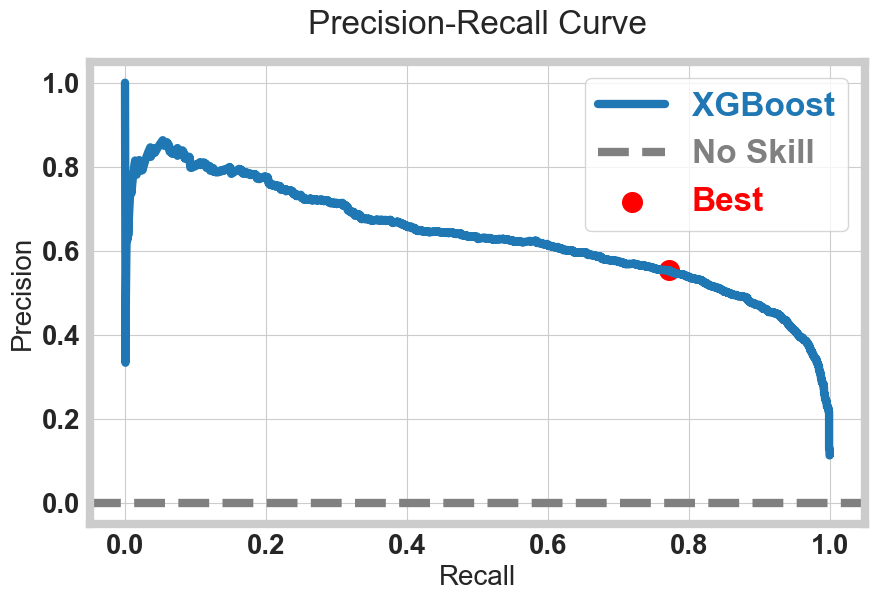

In [174]:
# Plot the precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall[valid_indices], precision[valid_indices], marker='.', label ='XGBoost')
plt.axhline(0, color = 'gray', linestyle = '--', label = 'No Skill')
plt.scatter(recall[f_idxmax], precision[f_idxmax], marker = 'o', color = 'red', s = 200, label = 'Best')
# Add labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(labelcolor = 'linecolor')
plt.grid(True)
plt.show()

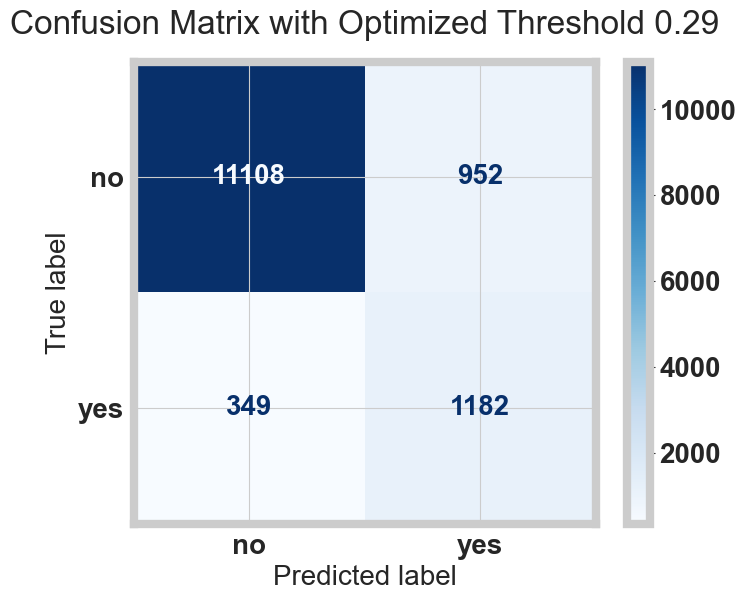

In [175]:
# Apply the optimized threshold to get crisp labels
y_pred_optimized = (y_probs >= optimized_threshold).astype(int)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_optimized)

# Create a figure with the desired size
fig, ax = plt.subplots(figsize=(8, 6))

# Display confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no', 'yes'])
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title(f'Confusion Matrix with Optimized Threshold {optimized_threshold:.2f}')
plt.show()

## Neural Network

In [227]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from sklearn.metrics import make_scorer
from keras.layers import Dense
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD
from scikeras.wrappers import KerasClassifier

In [214]:
# convert to numpy arrays
X_train_np = X_train_new.to_numpy()
y_train_np = y_train.to_numpy()
X_test_np = X_test_new.to_numpy()
y_test_np = y_test.to_numpy()

To accomodate the class imbalance in the training set, we extract the number of yes and no to term deposit subscription using numpy `bincount` function.

In [215]:
counts = np.bincount(y_train_np)
counts

array([24484,  3109], dtype=int64)

Below we use the reciprocal of each target class frequency to generate the weights of our model.

In [216]:
weight_for_0 = 1/counts[0]   # weight for no subscription
weight_for_1 = 1/counts[1]   # weight for yes subscription
weight_for_0, weight_for_1

(4.0842999509884004e-05, 0.000321646831778707)

In [217]:
# Standardize the data
scaler = StandardScaler()

X_train_np = scaler.fit_transform(X_train_np)
X_test_np = scaler.transform(X_test_np)

We compile the model using adaptive moment estimation (adam) as gradient descent optimizer and binary cross-entropy as our loss function.

Lets define target class crisp labels and their corresponding weights as dictionary.

In [218]:
# class_weights = {
#     0: weight_for_0,
#     1: weight_for_1
# }

In [200]:
# optimized class_weights
class_weights = {0: 1, 1: 3}

# Define the model
model = Sequential([
    Dense(64, activation = 'relu', kernel_regularizer=l2(0.01)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')
])

# Compile the model with multiple metrics
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
fit_model = model.fit(
    X_train_np,
    y_train_np,
    batch_size = 512,
    epochs = 100,
    verbose = 0,
    validation_data=(X_test_np, y_test_np),
    class_weight=class_weights,
    callbacks=[early_stopping]
)

# Predict probabilities
y_pred_prob = model.predict(X_test_np)

# Find the best threshold
precision, recall, thresholds = precision_recall_curve(y_test_np, y_pred_prob)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

# Apply the best threshold
y_pred = (y_pred_prob >= best_threshold).astype(int)

# Calculate the F1 score
f1 = f1_score(y_test_np, y_pred)
print(f'Best Threshold: {best_threshold}, F1 Score: {f1}')

425/425 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step
Best Threshold: 0.4740145206451416, F1 Score: 0.5878627968337731


We can create a stratified subsample for testing to evaluate the runtime and verify the code’s functionality before executing it on the full dataset.

In [250]:
from sklearn.model_selection import StratifiedShuffleSplit

def get_stratified_sample(X, y, sample_fraction = 0.1):
    """ X and y are numpy arrays"""
    # Define the stratified shuffle split
    stratified_split = StratifiedShuffleSplit(n_splits = 1, test_size = sample_fraction, random_state = 42)

    # Generate the stratified sample
    for _, sample_index in stratified_split.split(X, y):
        X_sample = X[sample_index]  # Use .iloc to select rows by index
        y_sample = y[sample_index]  # Use .iloc to select rows by index

    # Check the class distribution in the sample
    print("Class distribution in the sample:", np.bincount(y_sample))

    return X_sample, y_sample


In [240]:
X_sample, y_sample = get_stratified_sample(X_train_np, y_train_np, sample_fraction = 0.1)
# Define the model creation function
def create_model(optimizer='adam', activation='relu', learning_rate=0.01):
    model = Sequential()
    # Input layer
    model.add(Dense(64, input_shape=(X_train_np.shape[-1],), activation=activation))
    # Hidden Layer 1
    model.add(Dense(32, activation=activation))
    # Hidden layer 2
    model.add(Dense(16, activation=activation))
    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with the specified optimizer and learning rate
    if optimizer == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
        
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Fix random seed for reproducibility
seed = 42
tf.random.set_seed(seed)

# Wrap the model using KerasClassifier, batch_size and epochs are passed here
model = KerasClassifier(
    model=create_model,
    verbose=0
)

# Define the grid search parameters
epochs = [50, 75, 100]
batch_size = [32, 64, 128]
activation = ['relu', 'tanh']
learning_rate = [0.001, 0.01, 0.1]

param_grid = dict(
    model__activation=activation,
    model__learning_rate=learning_rate,
    batch_size=batch_size,  # Passed to KerasClassifier, not to the model function
    epochs=epochs  # Passed to KerasClassifier
)

# Define class weights
class_weights = [{0: 1, 1: w} for w in range(3, 10, 3)]

# Create the GridSearchCV object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
best_score = 0
best_params = None

# Perform Grid Search with Cross-Validation for each class weight
for cw in class_weights:
    model.set_params(class_weight=cw)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=skf, scoring = make_scorer(f1_score), n_jobs=-1)
    grid_result = grid.fit(X_sample, y_sample)
    
    # Check if the current score is better than the best score
    if grid_result.best_score_ > best_score:
        best_score = grid_result.best_score_
        best_params = grid_result.best_params_
        best_params['class_weight'] = cw

# Summarize the results
print(f"Best: {best_score} using {best_params}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{mean} ({stdev}) with: {param}")


Best: 0.5152174687008905 using {'batch_size': 128, 'epochs': 50, 'model__activation': 'relu', 'model__learning_rate': 0.001, 'class_weight': {0: 1, 1: 3}}
0.4526562336650925 (0.04778091632062143) with: {'batch_size': 32, 'epochs': 50, 'model__activation': 'relu', 'model__learning_rate': 0.001}
0.4741232753315128 (0.036602761529925504) with: {'batch_size': 32, 'epochs': 50, 'model__activation': 'relu', 'model__learning_rate': 0.01}
0.24228891719068027 (0.08036506676426419) with: {'batch_size': 32, 'epochs': 50, 'model__activation': 'relu', 'model__learning_rate': 0.1}
0.4792476047635441 (0.04037661256657055) with: {'batch_size': 32, 'epochs': 50, 'model__activation': 'tanh', 'model__learning_rate': 0.001}
0.46335202812794785 (0.03354435586440852) with: {'batch_size': 32, 'epochs': 50, 'model__activation': 'tanh', 'model__learning_rate': 0.01}
0.3911638170370718 (0.020693360634566334) with: {'batch_size': 32, 'epochs': 50, 'model__activation': 'tanh', 'model__learning_rate': 0.1}
0.46307

In [224]:
best_params

{'batch_size': 32,
 'epochs': 75,
 'model__activation': 'relu',
 'model__learning_rate': 0.1,
 'class_weight': {0: 1, 1: 3}}

In [226]:
# Define the model creation function
def create_model(optimizer='adam', activation='relu', learning_rate=0.01):
    model = Sequential()
    # Input layer
    model.add(Dense(64, input_shape=(X_train_np.shape[-1],), activation=activation))
    # Hidden Layer 1
    model.add(Dense(32, activation=activation))
    # Hidden layer 2
    model.add(Dense(16, activation=activation))
    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)

        
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Fix random seed for reproducibility
seed = 42
tf.random.set_seed(seed)

# Extract best parameters
best_params = {
    'batch_size': 32,
    'epochs': 75,
    'model__activation': 'relu',
    'model__learning_rate': 0.1,
    'class_weight': {0: 1, 1: 3}
}

# Wrap the model using KerasClassifier with the best parameters
model = KerasClassifier(
    model=create_model,
    batch_size=best_params['batch_size'],
    epochs=best_params['epochs'],
    model__activation=best_params['model__activation'],
    model__learning_rate=best_params['model__learning_rate'],
    class_weight=best_params['class_weight'],
    verbose=2
)

# Train the model
model.fit(X_train_np, y_train_np)

# Predict on training and test data
y_train_pred = model.predict(X_train_np)
y_test_pred = model.predict(X_test_np)

# Calculate metrics for training data
train_precision = precision_score(y_train_np, y_train_pred)
train_recall = recall_score(y_train_np, y_train_pred)
train_f1 = f1_score(y_train_np, y_train_pred)
train_accuracy = accuracy_score(y_train_np, y_train_pred)

# Calculate metrics for test data
test_precision = precision_score(y_test_np, y_test_pred)
test_recall = recall_score(y_test_np, y_test_pred)
test_f1 = f1_score(y_test_np, y_test_pred)
test_accuracy = accuracy_score(y_test_np, y_test_pred)

# Print the results
print(f"Train Precision: {train_precision}")
print(f"Train Recall: {train_recall}")
print(f"Train F1 Score: {train_f1}")
print(f"Train Accuracy: {train_accuracy}")

print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {test_f1}")
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/75
863/863 - 2s - 3ms/step - accuracy: 0.8651 - loss: 0.6879
Epoch 2/75
863/863 - 1s - 911us/step - accuracy: 0.8820 - loss: 0.7250
Epoch 3/75
863/863 - 1s - 985us/step - accuracy: 0.8873 - loss: 0.7249
Epoch 4/75
863/863 - 1s - 915us/step - accuracy: 0.8873 - loss: 0.7249
Epoch 5/75
863/863 - 1s - 881us/step - accuracy: 0.8873 - loss: 0.7249
Epoch 6/75
863/863 - 1s - 855us/step - accuracy: 0.8873 - loss: 0.7249
Epoch 7/75
863/863 - 1s - 857us/step - accuracy: 0.8873 - loss: 0.7249
Epoch 8/75
863/863 - 1s - 859us/step - accuracy: 0.8873 - loss: 0.7249
Epoch 9/75
863/863 - 1s - 889us/step - accuracy: 0.8873 - loss: 0.7249
Epoch 10/75
863/863 - 1s - 862us/step - accuracy: 0.8873 - loss: 0.7249
Epoch 11/75
863/863 - 1s - 853us/step - accuracy: 0.8873 - loss: 0.7249
Epoch 12/75
863/863 - 1s - 901us/step - accuracy: 0.8873 - loss: 0.7249
Epoch 13/75
863/863 - 1s - 868us/step - accuracy: 0.8873 - loss: 0.7249
Epoch 14/75
863/863 - 1s - 869us/step - accuracy: 0.8873 - loss: 0.7249
Epo

In [278]:
# Mapping dictionary
mapping = {0: 1, 1: 3}

# Repeat rows based on the mapping
desired_df = encoded_df.drop(columns = ['poutcome_nonexistent', 'previous', 'poutcome_nonexistent',
 'loan_yes', 'housing_yes'])

In [280]:
# Split the data into training and test sets
X_rs, y_rs = desired_df.drop(columns='Subscription'), desired_df['Subscription']
X_rs_train, X_rs_test, y_rs_train, y_rs_test = train_test_split(X_rs, y_rs, test_size=0.30, stratify=y_rs, shuffle=True)

# Find indices where y_rs_train is 1 and 0
indices_1 = y_rs_train[y_rs_train == 1].index
indices_0 = y_rs_train[y_rs_train == 0].index

# Repeat the indices according to the mapping
indices_1_repeated = np.repeat(indices_1, mapping[1])
indices_0_repeated = np.repeat(indices_0, mapping[0])

# Combine the repeated indices
all_indices = np.concatenate([indices_1_repeated, indices_0_repeated])

# Upsample the training data
X_rs_train_upsampled = X_rs_train.loc[all_indices].reset_index(drop=True)
y_rs_train_upsampled = y_rs_train.loc[all_indices].reset_index(drop=True)

# Convert to numpy arrays if needed
X_rs_train_upsampled = X_rs_train_upsampled.to_numpy()
X_rs_test = X_rs_test.to_numpy()
y_rs_train_upsampled = y_rs_train_upsampled.to_numpy()
y_rs_test = y_rs_test.to_numpy()

# Check the class distribution in the upsampled training set
print("Class distribution in the upsampled training set:\n", 
      pd.Series(y_rs_train_upsampled).value_counts())


Class distribution in the upsampled training set:
 0    25580
1     9744
Name: count, dtype: int64


In [295]:
# Define the model creation function
def create_model(optimizer='adam', activation='relu', learning_rate=0.01):
    model = Sequential()
    # Input layer
    model.add(Dense(64, input_shape=(X_train_np.shape[-1],), activation=activation))
    # Hidden Layer 1
    model.add(Dense(32, activation=activation))
    # Hidden layer 2
    model.add(Dense(16, activation=activation))
    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with the specified optimizer and learning rate
    if optimizer == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
        
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Fix random seed for reproducibility
seed = 42
tf.random.set_seed(seed)

# Wrap the model using KerasClassifier, batch_size and epochs are passed here
model = KerasClassifier(
    model=create_model,
    verbose=0
)

# Define the grid search parameters
epochs = [50, 75, 100]
batch_size = [32, 64, 128]
activation = ['relu', 'tanh']
learning_rate = [0.001, 0.01, 0.1]

param_grid = dict(
    model__activation=activation,
    model__learning_rate=learning_rate,
    batch_size=batch_size,  # Passed to KerasClassifier, not to the model function
    epochs=epochs  # Passed to KerasClassifier
)

# Create the GridSearchCV object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
X_rs_sample, y_rs_sample = get_stratified_sample(X_train_np, y_train_np, sample_fraction = 0.15)
# Perform Grid Search with Cross-Validation for each class weight
model.set_params(class_weight=cw)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=skf, scoring = make_scorer(f1_score), n_jobs=-1)
grid_result = grid.fit(X_rs_sample, y_rs_sample)
    

# Summarize the results
print(f"{best_score} using {best_params}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{mean} ({stdev}) with: {param}")

Class distribution in the sample: [3673  466]
0.5152174687008905 using {'batch_size': 128, 'epochs': 50, 'model__activation': 'relu', 'model__learning_rate': 0.001, 'class_weight': {0: 1, 1: 3}}
0.4939573110182514 (0.040171849637814935) with: {'batch_size': 32, 'epochs': 50, 'model__activation': 'relu', 'model__learning_rate': 0.001}
0.47844130164287746 (0.035768872540704405) with: {'batch_size': 32, 'epochs': 50, 'model__activation': 'relu', 'model__learning_rate': 0.01}
0.19999404256958106 (0.12405413706373217) with: {'batch_size': 32, 'epochs': 50, 'model__activation': 'relu', 'model__learning_rate': 0.1}
0.47507040863118427 (0.04308134172515823) with: {'batch_size': 32, 'epochs': 50, 'model__activation': 'tanh', 'model__learning_rate': 0.001}
0.49466231088749835 (0.04691858431548746) with: {'batch_size': 32, 'epochs': 50, 'model__activation': 'tanh', 'model__learning_rate': 0.01}
0.3930341395326273 (0.03458705247513105) with: {'batch_size': 32, 'epochs': 50, 'model__activation': 't

In [263]:
grid_result.best_params_

{'batch_size': 64,
 'epochs': 50,
 'model__activation': 'relu',
 'model__learning_rate': 0.001}

In [286]:
# Define the model creation function
def create_model(optimizer='adam', activation='relu', learning_rate=0.001):
    model = Sequential()
    # Input layer
    model.add(Dense(64, input_shape=(X_train_np.shape[-1],), activation=activation))
    # Hidden Layer 1
    model.add(Dense(32, activation=activation))
    # Hidden layer 2
    model.add(Dense(16, activation=activation))
    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    if optimizer == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    else:
        raise ValueError("Only valid optimizer is 'adam'")
        
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Fix random seed for reproducibility
seed = 42
tf.random.set_seed(seed)

# Wrap the model using KerasClassifier, batch_size and epochs are passed here
model = KerasClassifier(
    model=create_model,
    batch_size=32,
    epochs=75,
    verbose=0
)

# Train the model
model.fit(X_rs_train_upsampled, y_rs_train_upsampled)

# Predict on training and test data
y_train_pred = model.predict(X_rs_train_upsampled)
y_test_pred = model.predict(X_rs_test)

# Calculate metrics for training data
train_accuracy = accuracy_score(y_rs_train_upsampled, y_train_pred)
train_precision = precision_score(y_rs_train_upsampled, y_train_pred)
train_recall = recall_score(y_rs_train_upsampled, y_train_pred)
train_f1 = f1_score(y_rs_train_upsampled, y_train_pred)

# Calculate metrics for test data
test_accuracy = accuracy_score(y_rs_test, y_test_pred)
test_precision = precision_score(y_rs_test, y_test_pred)
test_recall = recall_score(y_rs_test, y_test_pred)
test_f1 = f1_score(y_rs_test, y_test_pred)

# Print the results
print("Training Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")
print("\nClassification Report (Train):")
print(classification_report(y_rs_train_upsampled, y_train_pred))

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")
print("\nClassification Report (Test):")
print(classification_report(y_rs_test, y_test_pred))

Training Metrics:
Accuracy: 0.8156777261918242
Precision: 0.6122959360889197
Recall: 0.9045566502463054
F1 Score: 0.7302705165914081

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.96      0.78      0.86     25580
           1       0.61      0.90      0.73      9744

    accuracy                           0.82     35324
   macro avg       0.78      0.84      0.80     35324
weighted avg       0.86      0.82      0.82     35324


Test Metrics:
Accuracy: 0.7951602460343153
Precision: 0.3412322274881517
Recall: 0.8793103448275862
F1 Score: 0.491664992970476

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.98      0.78      0.87     10964
           1       0.34      0.88      0.49      1392

    accuracy                           0.80     12356
   macro avg       0.66      0.83      0.68     12356
weighted avg       0.91      0.80      0.83     12356



In [390]:
# save_model_results(model, 'tuned_neural_network')

## Discussions and Recommendations

In our term deposit subscription model, we aim to predict whether a customer will subscribe to a term deposit. Here, `1` represents a customer who subscribes (“yes”), and `0` represents a customer who does not subscribe (“no”).

### Optimizing the Threshold

We have optimized the decision threshold to better predict customers who will subscribe (`1`). In the context of predicting term deposit subscriptions, recall is particularly useful when the cost of false negatives is high. This means we aim to identify all potential subscribers, even if it results in some false positives (predicting a customer will subscribe when they actually won't). By adjusting the threshold, we aim to:

- **Increase True Positives**: Correctly identify more customers who will subscribe.
- **Accept More False Positives**: Allow some customers who won’t subscribe to be predicted as subscribers, leading to a slight increase in marketing costs.

### Trade-Offs and Business Impact

- **Optimized Precision (0.566)**: Precision measures how many of the predicted subscribers actually subscribe. With a precision of 56.6%, we acknowledge that some marketing efforts will be spent on customers who do not subscribe. This is a trade-off we accept to ensure we capture more actual subscribers.
- **Optimized Recall (0.762)**: Recall measures how many actual subscribers are correctly identified. With a recall of 76.2%, we significantly reduce the risk of missing potential subscribers. This is crucial as missing a potential subscriber could mean losing a valuable customer.

### Balancing Precision and Recall

- **Maximized F1 Score (0.649)**: The F1 score is the harmonic mean of precision and recall, providing a balance between the two. A maximized F1 score of 64.9% indicates a good balance, ensuring we capture most subscribers while maintaining reasonable marketing costs.

### Business Needs and Model Optimization

The choice between optimizing for precision or recall depends on business priorities:

- **High Precision**: If the cost of marketing to non-subscribers is very high, we might prioritize precision to minimize unnecessary marketing expenses.
- **High Recall**: If the cost of missing a potential subscriber is higher, we prioritize recall to ensure we capture as many subscribers as possible.

### Conclusion

By optimizing the threshold, we have tailored the model to better predict subscribers, balancing the trade-off between false positives and false negatives. This approach helps us retain potential subscribers while managing marketing costs effectively, aligning with our business goals.


## References

[1. Chase Bank: Can you take money out of a savings account?](https://www.chase.com/personal/banking/education/basics/can-you-take-money-out-of-a-savings-account)

 [2. Key Savings Statistics And Trends In 2024](https://www.forbes.com/advisor/banking/savings/american-savings-statistics/)

 [3. Machine Learning from Imbalanced Data Sets 101](https://cdn.aaai.org/Workshops/2000/WS-00-05/WS00-05-001.pdf)
 
 [4. Learning from Imbalanced Data Sets](https://link.springer.com/book/10.1007/978-3-319-98074-4)

 [5. Threshold Moving for Imbalanced Classification](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/)
 
[Back to Table of Contents](#table-of-contents)